# Table of Content


1. **[Problem Statement](#data)**
2. **[Import Libraries](#lib)**
3. **[Reading the datasets](#read)**
4. **[Exploratory Data Analysis](#eda)**<br>
    4.1.  **[Exploratory Data Analysis On Orders dataframe](#orders)**<br>
    4.2.  **[Exploratory Data Analysis On OrderItems Dataframe](#orderItems)**<br>
    4.3.  **[Exploratory Data Analysis On Payments DataFrame](#payments)**<br>
    4.4.  **[Exploratory Data Analysis On Product Category Translation Dataframe](#pct)**<br>
    4.5.  **[Exploratory Data Analysis On Order reviews dataframe](#reviews)**<br>
    4.6.  **[Exploratory Data Analysis On Customers Dataframe](#customers)**<br> 
    4.7.  **[Exploratory Data Analysis On Geolocation dataframe](#geolocation)**<br>
    4.8.  **[Exploratory Data Analysis On Products dataframe](#products)**<br>
    4.9.  **[Exploratory Data Analysis On Sellers Dataframe](#sellers)**<br>
5. **[Merging the individual datasets](#merge)**
6. **[Creating a grouped-by dataframe based on individual customers](#Grp)**
7. **[RFM Analysis](#rfm)**<br>
    7.1. **[Recency](#recency)**<br>
    7.2. **[Frequency](#frequency)**<br>
    7.3. **[Monetary](#monetary)**<br>
    7.4. **[Analysing the RFM data](#rfmanalysis)**<br>
8. **[Providing labels for the RFM](#seg)**<br>
    8.1. **[Labels for Recency](#lare)**<br>
    8.2. **[Labels for Frequency](#lafr)**<br>
    8.3. **[Labels for Monetary](#lamy)**<br>
    8.4. **[Meaning of ranks](#ranking)**<br>
    8.5. **[Combining the labels](#insights)**<br>
9. **[Creating a target variable](#target)**
10. **[Merging the target variable with final dataframe](#finaldf)**<br>
11. **[Feature Engineering](#fe)**<br>
12. **[Outlier Treatement](#out)**<br>
13. **[Bi-variate Analysis](#edafinal)**<br>
    13.1. **[Target Imbalance](#targetImbalance)**<br>
    13.2. **[Multi-variate Analysis](#multivariate)**<br>
14. **[Statistical Tests](#stats)**<br>
15. **[Numerical Columns Treatment](#nct)**<br>
    15.1. **[Transformation of data](#trans)**<br>
16. **[Categorical Columns Treatment](#cct)**<br>
    16.1. **[Label Encoding](#le)**<br>
    16.2. **[Frequency Encoding](#fe)**<br>
    16.3. **[Target Encoding](#te)**<br>
    16.4. **[One-Hot Encoding](#he)**<br>
17. **[Classification Models](#class)**<br>
    17.1. **[Train-Test split](#traintest)**<br>
    17.2. **[Logit Regression](#logit)**<br>
    17.3. **[Logistic Regression](#logistic)**<br>
    17.4. **[KNN 3 Clusters Model](#knn3)**<br>
    17.5. **[Naive Bayes](#naive)**<br>
    17.6. **[Decision Tree Model](#decisionTree)**<br>
    17.7. **[Random Forest Classifier](#randomForest)**<br>
    17.8. **[Gradient Boosting Classifier](#gbc)**<br>
    17.9. **[XGBoost Model](#xgboost)**<br>
18. **[Stacking Technique](#st)**<br>
19. **[Recursive Feature Elimination of model](#rfe)**<br>
    19.1. **[XGBoost Model - RFE](#rfexg)**<br>
20. **[Model Interpretation](#interpretation)**<br>

<a id="data"></a>
# 1. Problem Statement

The objective of this project is to develop a machine learning model that can predict customer churn in the Brazilian e-commerce industry based on customer purchase behavior and other relevant features, including the RFM (Recency, Frequency, Monetary) technique. 

The model will use a combination of RFM( columns for the use of RFM for us wouldbe customer unique id( for the purpose of frequency), payment_value (customer-wise , for the purpose of monetary ), order_purchase_timestamp, (for the purpose of recency)  and other relevant input variables to predict which customers are likely to churn in the future . 

The model will be trained using various machine learning algorithms, including logistic regression, random forest, and gradient boosting, to determine the most accurate algorithm for predicting customer churn on the given dataset. 

The goal of this project is to help e-commerce companies better understand their customers' purchase behavior and to develop targeted marketing strategies to retain valuable customers and improve overall business performance.


<a id="lib"></a>
# 2. Importing Libraries 

In [842]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE

<a id="read"></a>
# 3. Read Data 

In [843]:
#Olist E-Commerce datasets
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
orderItems = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
orderReviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
productCategoryTranslation = pd.read_csv("product_category_name_translation.csv")

<a id="eda"></a>
# 4. Basic EDA ( Exploratory Data Analysis)

## Exploratory Data Analysis

* Univariate Analysis
* Bivariate Analysis
* Missing Values
* Outlier Identification and Removal
* Feature Engineering
* Statistical Analysis
* Scaling/Transformation...

At this stage the data is ready for Modelling


### In the Basic EDA we will look into the individual dataset and will treat only Missing Values  and Change the data type and also if needed will create new features. 

<a id="orders"></a>
## 4.1. Orders Dataframe

In [844]:
print('Number of Records:',orders.shape[0])
print('Number of Columns:',orders.shape[1])

Number of Records: 99441
Number of Columns: 8


In [845]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Changing the Data Type 

The main data types stored in Pandas data frames are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.



### Since, the Dates are in object form so we need to convert them into date time 

In [846]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)

In [847]:
orders.info()
# Now All the variables have the data type as per the data definition.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Checking Null Values

In [848]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

 We Will be dealing with the null values after creation of certain features that can be useful to easily deal with the missing values.

In [849]:
orders[orders.isna().any(axis = 1)]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

### New Feature Creation 

In [850]:
orders['purchased_approved '] = (orders.order_approved_at -orders.order_purchase_timestamp).dt.seconds
orders['approved_carrier'] = (orders.order_delivered_carrier_date - orders.order_approved_at).dt.days
orders['carrier_delivered'] = (orders.order_delivered_customer_date - orders.order_delivered_carrier_date).dt.days
orders['delivered_estimated'] = (orders.order_estimated_delivery_date - orders.order_delivered_customer_date).dt.days
orders['purchased_delivered'] = (orders.order_delivered_customer_date - orders.order_purchase_timestamp).dt.days
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642.000000,2.000000,6.000000,7.000000,8.000000
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,24170.000000,0.000000,12.000000,5.000000,13.000000
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994.000000,0.000000,9.000000,17.000000,9.000000
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073.000000,3.000000,9.000000,12.000000,13.000000
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710.000000,0.000000,1.000000,9.000000,2.000000


**Inferences:**

1. New columns are created using the available datetime columns for easy analysis of the available data.

2 . Purchasedapproved  represents the seconds taken for an order to get approved after the customer purchases it.

3 . approvedcarrier represents the days taken for the order to go to the delivery carrier after it being approved.

4 . carrierdelivered represents the days taken for the order to be delivered to the customer from the date it reaches the delivery carrier.

5 . deliveredestimated represents the date difference between the estimated delivery date and the actual delivery date. 

6 . purchaseddelivered represents the days taken for the order to be delivered to the customer from the date the customer made the purchase. 

### Statistics Summary of Orders

In [851]:
orders.describe()

,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
count,99281.000000,97644.000000,96475.000000,96476.000000,96476.000000
mean,14198.031496,2.301749,8.878310,10.876881,12.094086
std,23663.448160,3.560283,8.746088,10.183854,9.551746
min,0.000000,-172.000000,-17.000000,-189.000000,0.000000
25%,755.000000,0.000000,4.000000,6.000000,6.000000
50%,1169.000000,1.000000,7.000000,11.000000,10.000000
75%,17166.000000,3.000000,12.000000,16.000000,15.000000
max,86399.000000,125.000000,205.000000,146.000000,209.000000


**Observation:**

 The Negative value in approved_carrier display the  Orders which have carrier date before the date of order getting approved , and orders which have delivered date before  to the carrier date  are considered to be false data  , as it could not be logically true. Such records are  to dropped.
 

In [852]:
data_wrong = orders[orders.approved_carrier < 0].index
orders.drop(index = data_wrong, inplace = True)
# Selecting the indexes where wrong data has been recorded and deleting them in approved_carrier

In [853]:
data_wrong = orders[orders.carrier_delivered < 0].index
orders.drop(index = data_wrong, inplace = True)
# Selecting the indexes where wrong data has been recorded and deleting them in carrier_delivered

In [854]:
orders.shape

(98059, 13)

**The orders which are cancelled we are droping them as in few rows wrong info. is given only 6 instances are there.**

In [855]:
null = orders.dropna()[orders.order_status == 'canceled'].index
orders.drop(index = null, inplace = True)

In [856]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2956
order_estimated_delivery_date       0
purchased_approved                160
approved_carrier                 1797
carrier_delivered                2957
delivered_estimated              2956
purchased_delivered              2956
dtype: int64

In [857]:
orders.describe(include = np.number)

,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
count,97893.000000,96256.000000,95096.000000,95097.000000,95097.000000
mean,13950.420428,2.357224,8.910228,10.825568,12.153359
std,23484.689925,3.503335,8.755221,10.199320,9.577379
min,0.000000,0.000000,0.000000,-189.000000,0.000000
25%,752.000000,0.000000,4.000000,6.000000,6.000000
50%,1153.000000,1.000000,7.000000,11.000000,10.000000
75%,15785.000000,3.000000,12.000000,16.000000,15.000000
max,86399.000000,125.000000,205.000000,146.000000,209.000000


In Delivered Estimated minimum value is (-189) which means that order has been delivered 189 days late than estimated delivery time

### How Null Values Treatment is done ?

**Filling missing  values **

Missing values have been treated by median

1. The null values in the *order_approved_*at field is imputed by adding the  median number of seconds it took for an order to get approved after it is purchased, with the *order_purchase_timestamp*.
2.  The null values in the *order_delivered_carrier_date field is imputed by adding the median number of days it took for an     order to reach the carrier after it is approved, with the *order_approved_at* timestamp.
3.  The null values in the *order_delivered_customer_date* field is imputed by adding the **median number of days it took for an order to get delivered to the customer after it reaches the carrier, with the *order_delivered_carrier_date *timestamp.

In [858]:
notdelivered = orders[(orders.isna().any(axis = 1)) & (orders.order_status != 'delivered')]
notdelivered.shape

(2948, 13)

In [859]:
notdelivered.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,3789.000000,NaN,NaN,NaN,NaN
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,42390.000000,0.000000,NaN,NaN,NaN


The null values are to be dropped which do not have the order status as delivered. as they are not delivered and no information 
is given about that data

In [860]:
notdelerived = orders[(orders.isna().any(axis = 1)) & (orders.order_status != 'delivered')].index
orders.drop(index = notdelerived, inplace = True)

In [861]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'purchased_approved ', 'approved_carrier', 'carrier_delivered',
       'delivered_estimated', 'purchased_delivered'],
      dtype='object')

In [862]:
approvedAtNull = orders[orders.order_approved_at.isna()].index
orders.loc[approvedAtNull, 'order_approved_at'] = orders.loc[approvedAtNull, 'order_purchase_timestamp'] + pd.Timedelta(seconds = orders['purchased_approved '].median())


In [863]:
deliveredCarrierNull = orders[orders.order_delivered_carrier_date.isna()].index
orders.loc[deliveredCarrierNull, 'order_delivered_carrier_date'] = orders.loc[deliveredCarrierNull, 'order_approved_at'] + pd.Timedelta(days = orders.approved_carrier.median())


In [864]:
deliveredCustomerNull = orders[orders.order_delivered_customer_date.isna()].index
orders.loc[deliveredCustomerNull, 'order_delivered_customer_date'] = orders.loc[deliveredCustomerNull, 'order_delivered_carrier_date'] + pd.Timedelta(days = orders.carrier_delivered.median())


### Rechecking Null Values

In [865]:
orders.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                 0
order_delivered_carrier_date      0
order_delivered_customer_date     0
order_estimated_delivery_date     0
purchased_approved               14
approved_carrier                 16
carrier_delivered                 9
delivered_estimated               8
purchased_delivered               8
dtype: int64

1.  Still there are Null Values.
2.  This is because when we created new features there was already null values in the other features which leads to **Null   Values** in the New Features. 
3. To deal with this we have to run cell again in which new features was created.

In [866]:
orders['purchased_approved '] = (orders.order_approved_at -orders.order_purchase_timestamp).dt.seconds
orders['approved_carrier'] = (orders.order_delivered_carrier_date - orders.order_approved_at).dt.days
orders['carrier_delivered'] = (orders.order_delivered_customer_date - orders.order_delivered_carrier_date).dt.days
orders['delivered_estimated'] = (orders.order_estimated_delivery_date - orders.order_delivered_customer_date).dt.days
orders['purchased_delivered'] = (orders.order_delivered_customer_date - orders.order_purchase_timestamp).dt.days
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642,2,6,7,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,24170,0,12,5,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,994,0,9,17,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073,3,9,12,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3710,0,1,9,2


**Final Check on Missing Values**

In [867]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
purchased_approved               0
approved_carrier                 0
carrier_delivered                0
delivered_estimated              0
purchased_delivered              0
dtype: int64

**Distribution**

In [868]:
orders.describe(exclude = np.number)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,95105,95105,95105,95105,95105,95105,95105,95105
unique,95105,95105,1,94591,87320,79235,94311,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-06-01 13:39:44,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-02-14 21:09:19,2017-12-20 00:00:00
freq,1,1,95105,3,9,47,3,506
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [869]:
orders.describe()

,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
count,95105.000000,95105.000000,95105.000000,95105.000000,95105.000000
mean,13904.246517,2.351853,8.910509,10.825793,12.153147
std,23444.451686,3.490348,8.755888,10.199025,9.577021
min,0.000000,0.000000,0.000000,-189.000000,0.000000
25%,753.000000,0.000000,4.000000,6.000000,6.000000
50%,1153.000000,1.000000,7.000000,11.000000,10.000000
75%,15479.000000,3.000000,12.000000,16.000000,15.000000
max,86399.000000,125.000000,205.000000,146.000000,209.000000


 From the summary statistics, we could infer that the it took an average(median is considered as it is highly right skewed) of **1153 seconds** or **over half an hour hours** for the **order to get approved after the customer purchased it**. 
 
 It took on an **average of 12 days** for the **order to get delivered to the customer from the date of purchase**. 

Since we considered orders which are only **delivered**, the order_status feature has only **one class**, i.e., **delivered**. 

The **first order was placed on 15/09/2016** and the **last order was placed on 29/08/2018**, from the available dataset.
 On an average it took **11 days** for an **order to get delivered to the customer before the estimated date of delivery**. There are **many orders which were delivered late** than the estimated date of delivery.

In [870]:
orders.select_dtypes(include=np.number).columns

Index(['purchased_approved ', 'approved_carrier', 'carrier_delivered',
       'delivered_estimated', 'purchased_delivered'],
      dtype='object')

### Univariate Analysis

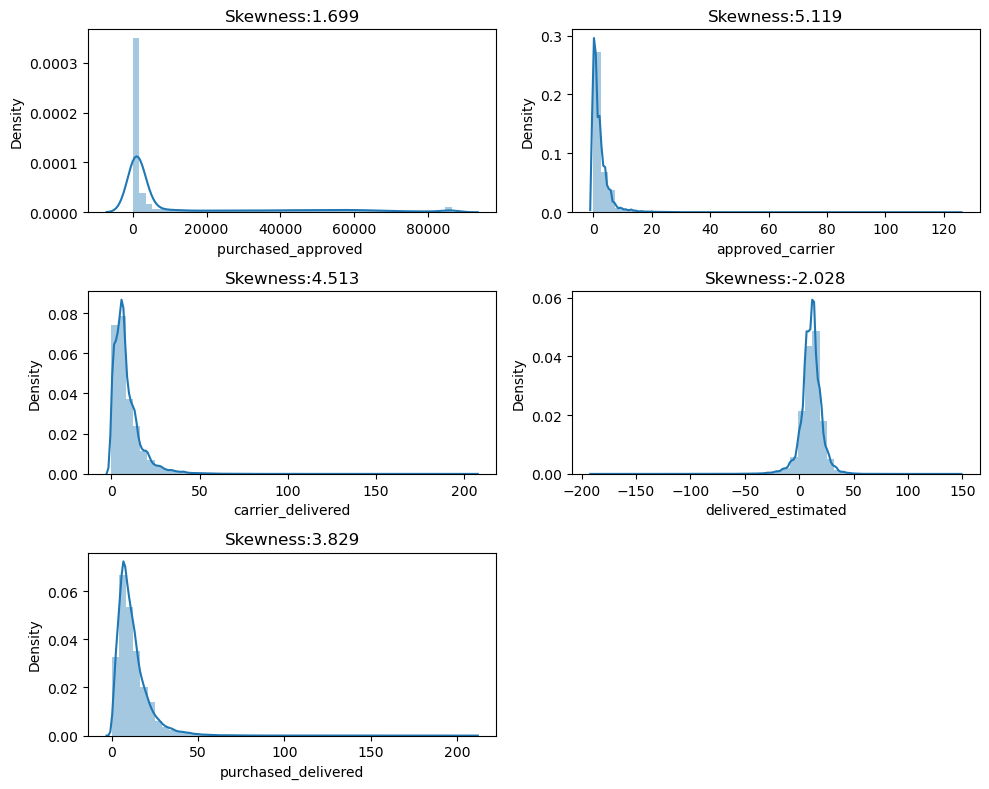

In [871]:
t = 1
plt.figure(figsize=(10,8))
for i in orders.select_dtypes(include=np.number):
    plt.subplot(3,2,t)
    sns.distplot(orders[i])
    plt.title('Skewness:%.3f'%orders[i].skew())
    t += 1
plt.tight_layout()
plt.show()
# Distribution of the numerical varibles 

<a id="orderItems"></a>
## 4.2. OrderItems Dataframe

In [872]:
print('Number of Records:',orderItems.shape[0])
print('Number of Columns:',orderItems.shape[1])

Number of Records: 112650
Number of Columns: 7


### Check For Data Type

In [873]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [874]:
# shipping_limit_date is datetime but has been displayed as object 
orderItems['shipping_limit_date'] = pd.to_datetime(orderItems.shipping_limit_date)

### Rechecking the Data Type

In [875]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Checking Null Values 

In [876]:
orderItems.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

No Null Values in the OrderItems Dataframe .

### Summary Statistics

In [877]:
orderItems.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [878]:
orderItems.describe(include='object')

,order_id,product_id,seller_id
count,112650,112650,112650
unique,98666,32951,3095
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0
freq,21,527,2033


**Observations:**
1. The order items dataframe consist of all the orders placed by the customers and the details of the products in that order. 
2. There are **98666 unique orders** placed with the business and the order with **most number of items** is **8272b63d03f5f79c56e9e4120aec44ef**, which has **21 items in a single order**. 
3. **32951 unique products** were ordered during the taken time period and the **most ordered product** is **aca2eb7d00ea1a7b8ebd4e68314663af**, which was ordered **527 times**. During the further stages of analysis, the product will be analysed mapping the ID with the products dataframe. 
4. Similarly there are **3095 unique sellers** for the product and the **seller who sells most of the product** is **6560211a19b47992c3666cc44a7e94c0**. This data is also masked but we can combine this with geolocation and find which state or city the sellers belong to and do further analysis. 
5. The **average price of the products** ordered is **120.65 Brazilian Reals**. The price of the products ordered is **highly right skewed**, as the **costliest product ordered** is priced at **6735 Brazilian Reals**. 
6. Similarly the **freight value** of the order **on an average for each order** is **19.99 Brazilian Reals**, and the **expensive freight value** is **409.68 Brazilian Reals**. The particular orders whose freight values are higher will be studied later in the course of analysis. 
7. Only Products where price starts from **54** , Only then **Freight value** is **0** for some products 
8. There are also products whose price value is **less than 1 Brazilian Real** but **freight value** is high i.e more than **15**  

In [879]:
orderItems.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900000,13.290000


In [880]:
orderItems = orderItems.groupby(['order_id']).agg({'order_item_id':'max','product_id':'max','seller_id':'max','price':'sum','freight_value':'sum'})

In [881]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98666 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_item_id  98666 non-null  int64  
 1   product_id     98666 non-null  object 
 2   seller_id      98666 non-null  object 
 3   price          98666 non-null  float64
 4   freight_value  98666 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.5+ MB


**Visualzing the Numerical columns**

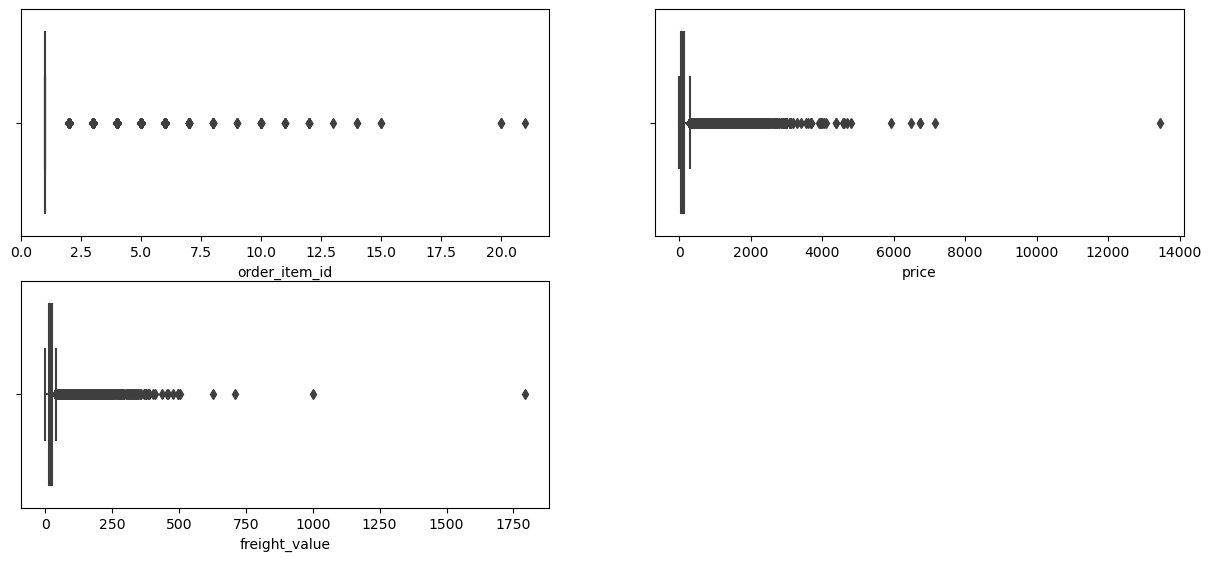

In [882]:
num_cols=orderItems.select_dtypes(include=np.number).columns
num_cols
plt.figure(figsize=(15,10))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(orderItems[i])
    t+=1
plt.tight_layout
plt.show()

In [883]:
orderItems.describe()

,order_item_id,price,freight_value
count,98666.000000,98666.000000,98666.000000
mean,1.141731,137.754076,22.823562
std,0.538452,210.645145,21.650909
min,1.000000,0.850000,0.000000
25%,1.000000,45.900000,13.850000
50%,1.000000,86.900000,17.170000
75%,1.000000,149.900000,24.040000
max,21.000000,13440.000000,1794.960000


Price , Freight , order_item_id (No. of items in the order) are highly skewed.

### Top 5 Sellers in terms of Number of orders

In [884]:
orderItems['seller_id'].value_counts().head(5)
# these are the seller id of top 5 sellers in terms of number of orders 

6560211a19b47992c3666cc44a7e94c0    1831
4a3ca9315b744ce9f8e9374361493884    1731
cc419e0650a3c5ba77189a1882b7556a    1705
1f50f920176fa81dab994f9023523100    1375
da8622b14eb17ae2831f4ac5b9dab84a    1311
Name: seller_id, dtype: int64

<a id="payments"></a>
##  4.3. Payments Dataframe

### Dimesion

In [885]:
print('Number of Records:',payments.shape[0])
print('Number of Columns:',payments.shape[1])

Number of Records: 103886
Number of Columns: 5


### Checking Data Types

In [886]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**All the variables have the data type as per the data definition. Thus, there is no need for type conversion.**


    Payment Sequential : A Customer has pay an order with more than one payment method. 

    Boleto means 'ticket' and is a popular Brazilian cash payment method.

### Checking Null Values 

In [887]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**No Null Values are there is the Payments Dataframe**

### Summary Statistics

In [888]:
payments.describe(include=np.number)

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [889]:
payments.describe(include='object')

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


**Inference**
1. The most used mode for payment is **credit card** 
2.  The **average number of payment installments** was **1**, since it is highly right skewed, the mean is not considered. **24 was the maximum number of payment installments** for an order. 
3. The payment value of the orders is also highly right skewed. The **average payment value** is **154.1 Brazilian Reals**.
4. **Payment Sequential** has highest value of **29** which does mean the customer has paid the order in **29** modes which may be illogical .Afterwards , We will be droping this column as no clear information has been given.
5. Most customers prefered to pay for the order in a **single installment**. However, customers also opted for more than one installment, the number is not insignificant.
6. For further analysis, we could **convert the installments to an object datatype** as we could not consider it as a numeric column.

### Visualization of Numerical Columns 

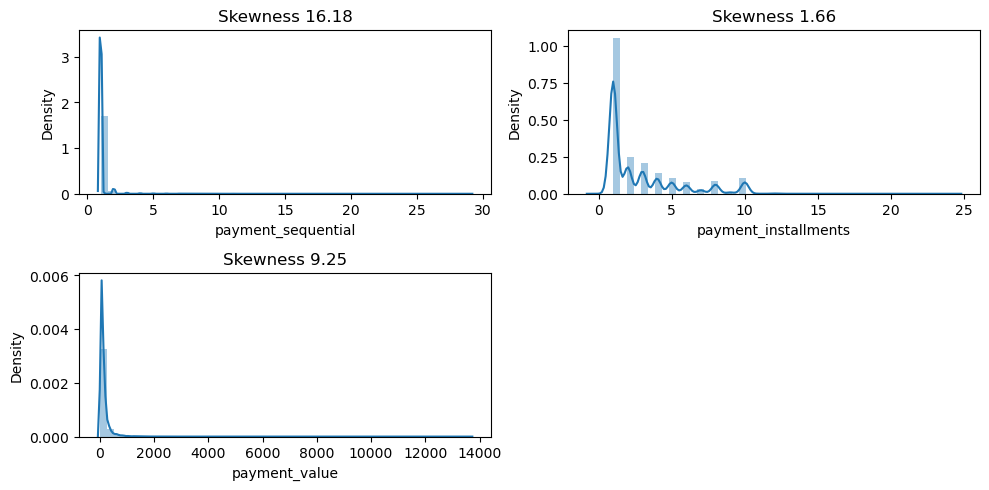

In [890]:
num_cols=payments.select_dtypes(include=np.number).columns
num_cols
plt.figure(figsize=(10,7))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(payments[i])
    plt.title('Skewness %.2f'%payments[i].skew())
    t+=1
plt.tight_layout()
plt.show()

Payment_value , Payment_installments , Payment_sequential is highly skewed.

### Visualization of Categorical Columns

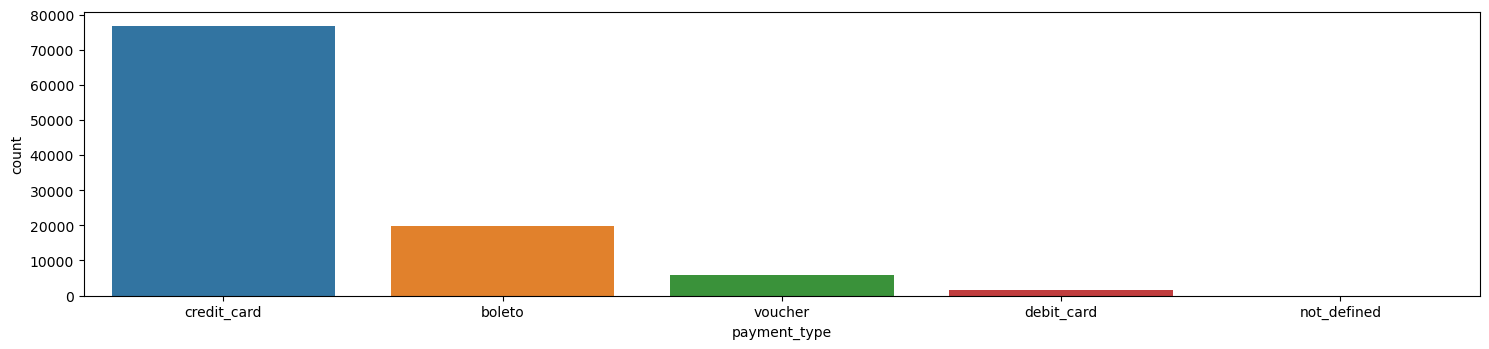

In [891]:
# We are visualizing the number of transaction done through various modes 
cat_cols=['payment_type']
plt.figure(figsize=(15,10))
t=1
for i in cat_cols:
    plt.subplot(3,1,t)
    sns.countplot(payments[i])
    t+=1
plt.tight_layout()
plt.show()

<a id="pct"></a>
##   4.4. Product Category Translation Dataframe

### Dimension

In [892]:
print('Number of records:',productCategoryTranslation.shape[0])
print('number of columns:',productCategoryTranslation.shape[1])

Number of records: 71
number of columns: 2


### Checking Data Type

In [893]:
productCategoryTranslation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**All the variables have the data type as per the data definition. Thus, there is no need for type conversion.**

### Checking Null Values 

In [894]:
productCategoryTranslation.isnull().sum()
# No null values in the productCategoryTranslation

product_category_name            0
product_category_name_english    0
dtype: int64

**No Null Values in the ProductCategoryTranslation**

**Observation:**

This table has only 2 columns which helps to know the **Product Name** in **English** that are written in **Portuguese**

<a id="reviews"></a>
##  4.5. OrderReviews Dataframe

### Dimensions

In [895]:
print('Number of records:',orderReviews.shape[0])
print('number of columns:',orderReviews.shape[1])

Number of records: 99224
number of columns: 7


### Checking for Data Type 

In [896]:
orderReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [897]:
orderReviews['review_answer_timestamp'] = pd.to_datetime(orderReviews.review_answer_timestamp)
orderReviews['review_creation_date'] = pd.to_datetime(orderReviews.review_creation_date)
# Since these columns are DateTime columns 
# These two columns are converted into datetime

### Rechecking Data Type

In [898]:
orderReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


### Checking Null Values 

In [899]:
(orderReviews.isnull().sum()/orderReviews['review_id'].count())*100

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title      88.341530
review_comment_message    58.702532
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

**Observations:**
1. There are **88.34%** of `review_comment_title` and **58.7%** of `review_comment_message` as **null values**.
2. We are **dropping** the columns as these are only significant to consider to know the **products reviews** Using **NLP**

#### Droping the unnecessary  Columns 

In [900]:
orderReviews.drop(['review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'],inplace=True,axis=1)

**Now there are no null values in the Order Reviews**

In [901]:
reviewScore = orderReviews.review_score.value_counts(normalize = True) * 100
reviewScore

5   57.776344
4   19.291704
1   11.513344
3    8.242965
2    3.175643
Name: review_score, dtype: float64

**More than 50% of the customers has given 5 score for the products and least is 2 Given by 3 percent customer**

### Univariate Analysis For Review Score

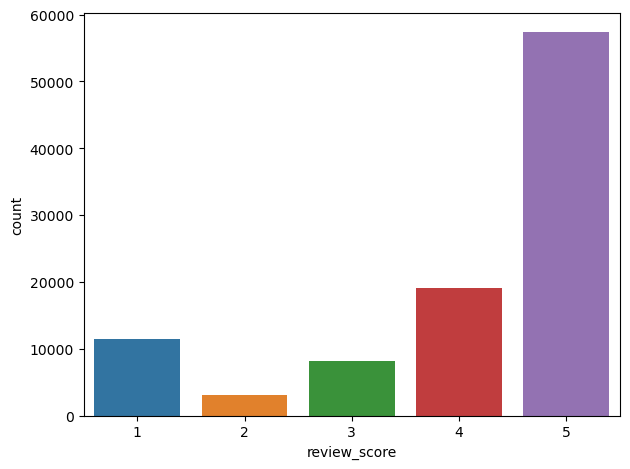

In [902]:
t=1
for i in orderReviews.select_dtypes(include=np.number):
    plt.subplot(1,1,t)
    sns.countplot(orderReviews[i])
    t+=1
plt.tight_layout()
plt.show()

<a id="customers"></a>
##  4.6. Customers Dataframe

### Dimensions

In [903]:
print('Number of records:',customers.shape[0])
print('number of columns:',customers.shape[1])

Number of records: 99441
number of columns: 5


### Checking Data Type 

In [904]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [905]:
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(object)
#Since customer_zip_code_prefix does not depict any number so it needs to be changed to object datatype


### Rechecking Data Type

In [906]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


### Checking Null Values 

In [907]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

There is no **Null Value** in the **Customers**.

### Top 5 cities in terms of customer belonging

In [908]:
customers['customer_city'].value_counts().head()
# so a large number of customers are coming from sao paulo city 

sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_city, dtype: int64

### Top 5 states in terms of customer belonging

In [909]:
customers['customer_state'].value_counts().head()
# so a large number of customers are coming from SP country 

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_state, dtype: int64

### Visualizing the categorical columns 

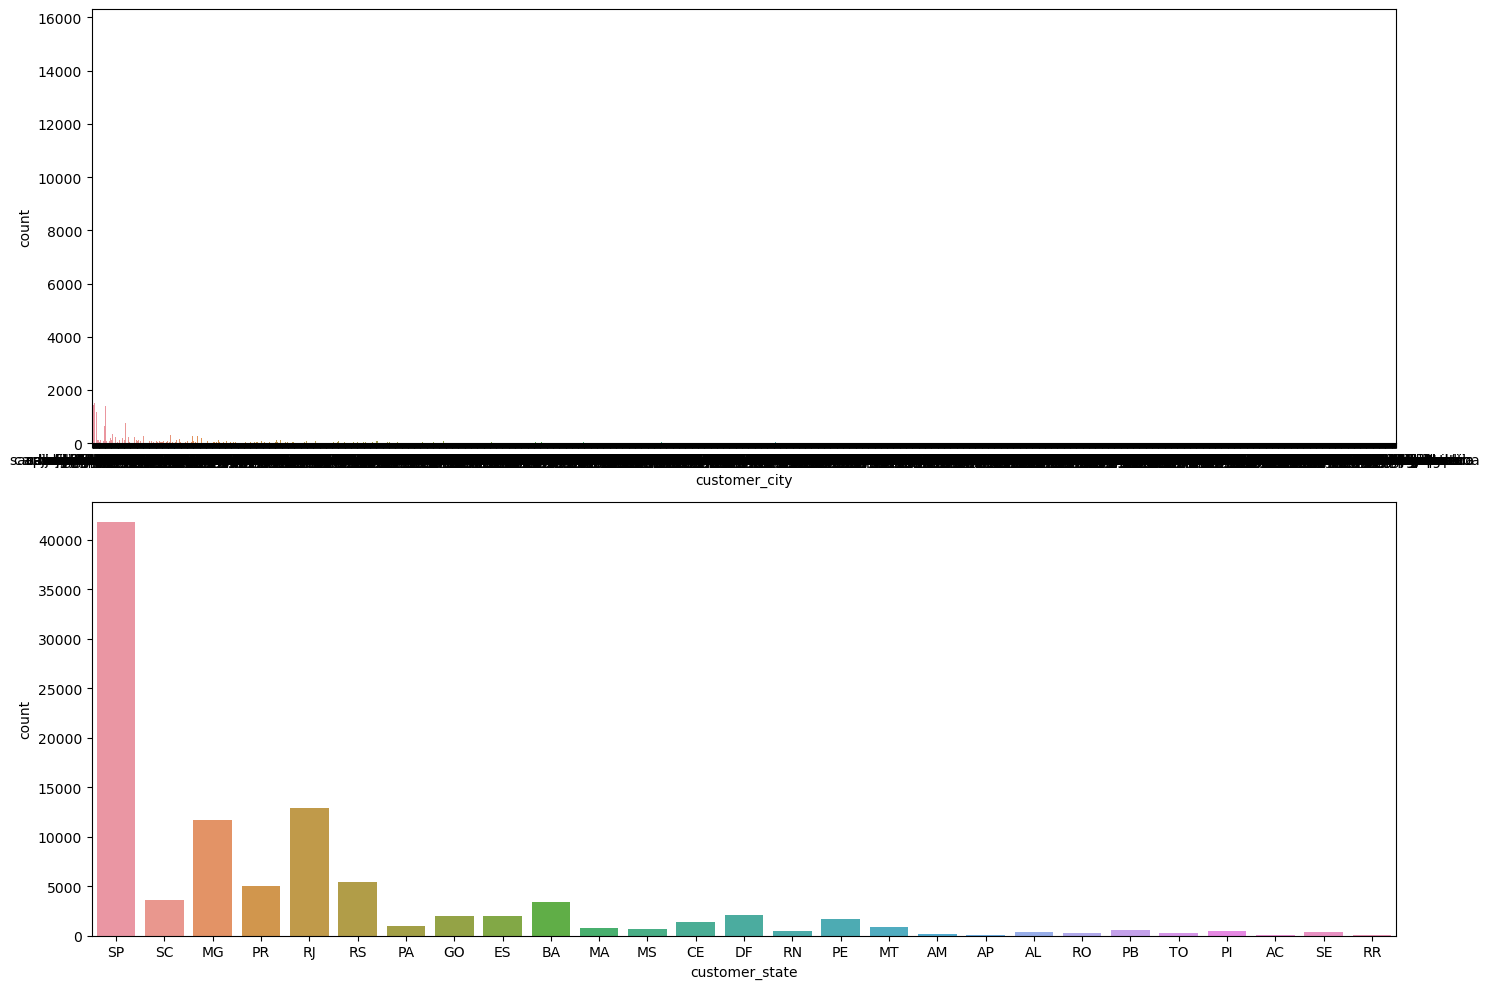

In [910]:
cat_cols = ['customer_city','customer_state']
plt.figure(figsize=(15,10))
t=1
for i in cat_cols:
    plt.subplot(2,1,t)
    sns.countplot(customers[i])
    t+=1
plt.tight_layout()
plt.show()

<a id="geolocation"></a>
##   4.7. Geolocation Dataframe

### Dimension

In [911]:
print('Number of records:',geolocation.shape[0])
print('number of columns:',geolocation.shape[1])

Number of records: 1000163
number of columns: 5


### Checking Data Type

In [912]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [913]:
# # Since geolocation_zip_code_prefix does not depict any number so it needs to be changed to object datatype
geolocation['geolocation_zip_code_prefix']=geolocation['geolocation_zip_code_prefix'].astype('object')

**Now All the variables have the data type as per the data definition. Thus, there is no need for type conversion.**

### Checking Null Values 

In [914]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**There is no Null Values in the Geolocation Dataframe**

<a id="products"></a>
##  4.8. Products Dataframe

### Dimension

In [915]:
print('Number of records:',products.shape[0])
print('number of columns:',products.shape[1])

Number of records: 32951
number of columns: 9


### Checking Data Type

In [916]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**product_name_lenght**,**product_description_lenght**,**product_photos_qty** does not provide any useful information so these needs to be dropped

In [917]:
products.drop(['product_name_lenght','product_description_lenght','product_photos_qty'],inplace=True,axis=1)

In [918]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


**Now All variables are correct as per Data Definition**

### Checking Null Values 

In [919]:
products.isnull().sum()

product_id                 0
product_category_name    610
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

Since we have no other data regarding the product_category_name which is linked to other table so it is better to drop the rows where we do not have product_category_name , product_weight_g , product_length_cm , product_height_cm , product_width_cm

In [920]:
products.dropna(inplace = True)

### Rechecking Null Values 

In [921]:
products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

<a id="sellers"></a>
##  4.9. Sellers Dataframe

### Dimension

In [922]:
print('Number of records:',sellers.shape[0])
print('number of columns:',sellers.shape[1])

Number of records: 3095
number of columns: 4


### Checking Data Type 

In [923]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [924]:
#Since seller_zip_code_prefix does not depict any number so it needs to be changed to object datatype
sellers['seller_zip_code_prefix'] = sellers['seller_zip_code_prefix'].astype(object)

**Now All the Variables have the data type as per the data definition**.

### Checking Null Values

In [925]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**No Null Values are there in the Sellers**

<a id="merge"></a>
## 5. Merging the datasets

In [926]:
df= pd.merge(customers, orders, on="customer_id", how='left')
df= df.merge(orderItems, on="order_id", how='left')
df= df.merge(products, on="product_id", how='left')
df= df.merge(payments, on="order_id", how='inner')
df= df.merge(sellers, on='seller_id', how='left')
df= df.merge(productCategoryTranslation, on='product_category_name', how='inner')
df= df.merge(orderReviews, on="order_id", how='inner')
df.shape

(97773, 37)

In [927]:
df.isnull().sum().sum()

0

### Distribution of the merged table 

<a id="Grp"></a>
# 6. Creating a combine dataframe on the basis of unique customer id 

In [928]:
final = df.groupby('customer_unique_id', as_index=False).agg({'customer_zip_code_prefix'          : 'max',
                                                                  'customer_city'                 : 'max',
                                                                  'customer_state'                : 'max',
                                                                  'order_id'                      : 'nunique',
                                                                  'purchased_approved '            : 'mean',
                                                                  'delivered_estimated'           : 'min',
                                                                  'purchased_delivered'           : 'mean',
                                                                  'carrier_delivered'             : 'mean',
                                                                  'approved_carrier'              : 'mean',
                                                                  'product_id'                    : 'nunique',
                                                                  'order_item_id'                 : 'max',
                                                                  'seller_id'                     : 'max',
                                                                  'seller_zip_code_prefix'        : 'max',
                                                                  'seller_city'                   : 'max',
                                                                  'seller_state'                  : 'max',
                                                                  'price'                         : 'sum',
                                                                  'freight_value'                 : 'sum',
                                                                  'product_weight_g'              : 'sum',
                                                                  'product_length_cm'             : 'sum',
                                                                  'product_height_cm'             : 'sum',
                                                                  'product_width_cm'              : 'sum',
                                                                  'payment_type'                  : 'max',
                                                                  'payment_installments'          : 'max',
                                                                  'payment_value'                 : 'sum',
                                                                  'review_score'                  : 'mean',
                                                                  'product_category_name_english' : 'max'})

final.head(3)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,purchased_approved,delivered_estimated,purchased_delivered,carrier_delivered,approved_carrier,product_id,order_item_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_type,payment_installments,payment_value,review_score,product_category_name_english
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,1,891.000000,4.000000,6.000000,4.000000,1.000000,1,1.000000,da8622b14eb17ae2831f4ac5b9dab84a,13405,piracicaba,SP,129.900000,12.000000,1500.000000,34.000000,7.000000,32.000000,credit_card,8,141.900000,5.000000,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,1,26057.000000,4.000000,3.000000,1.000000,1.000000,1,1.000000,138dbe45fc62f1e244378131a6801526,2215,sao paulo,SP,18.900000,8.290000,375.000000,26.000000,11.000000,18.000000,credit_card,1,27.190000,4.000000,health_beauty
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,1,0.000000,1.000000,25.000000,23.000000,2.000000,1,1.000000,3d871de0142ce09b7081e2b9d1733cb1,13232,campo limpo paulista,SP,69.000000,17.220000,1500.000000,25.000000,50.000000,35.000000,credit_card,8,86.220000,3.000000,stationery


In [929]:
final.shape

(90155, 27)

### Checking Null Values in the  final Table 

In [930]:
final.isnull().sum().sum()

0

No **Null values** in the final table 

### Analysis of Month Wise Customer Count

In [931]:
month = df[['customer_unique_id','order_purchase_timestamp']].sort_values('order_purchase_timestamp').drop_duplicates()

In [932]:
month['Month'] = month['order_purchase_timestamp'].dt.month
month['Year'] = month['order_purchase_timestamp'].dt.year

In [933]:
month['year_month'] = month['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [934]:
month.head()

,customer_unique_id,order_purchase_timestamp,Month,Year,year_month
69069,32ea3bdedab835c3aa6cb68ce66565ef,2016-10-03 09:44:50,10,2016,2016-10
11847,2f64e403852e6893ae37485d5fcacdaf,2016-10-03 16:56:50,10,2016,2016-10
8129,61db744d2f835035a5625b59350c6b63,2016-10-03 21:13:36,10,2016,2016-10
29385,8d3a54507421dbd2ce0a1d58046826e0,2016-10-03 22:06:03,10,2016,2016-10
93810,87776adb449c551e74c13fc34f036105,2016-10-03 22:31:31,10,2016,2016-10


In [935]:
customer_counts = month.groupby(['year_month'])['customer_unique_id'].nunique().reset_index()

In [936]:
customer_counts.head()

,year_month,customer_unique_id
0,2016-10,253
1,2016-12,1
2,2017-01,698
3,2017-02,1570
4,2017-03,2439


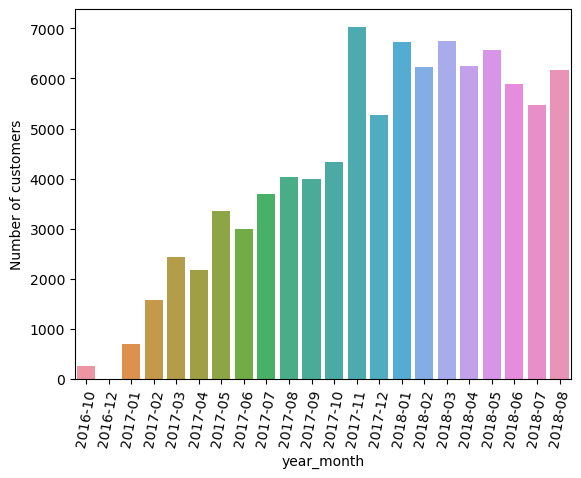

In [937]:
sns.barplot(x='year_month',y='customer_unique_id',data=customer_counts)
plt.xticks(rotation=80)
plt.ylabel('Number of customers')
plt.savefig('Monthwisecount.png')
plt.show()

**Inference**

**It is clearly visible that with the time company customer are increasing and also indicated that company orders are increasing.**

**The highest number of orders placed is in November 2017.**
This is becuase of the famous Event `Black-Friday Sale`.

### About Black Friday Sale -

Black Friday in Brazil has witnessed remarkable growth over the years, with increasing participation from retailers and consumers alike. It has become a significant revenue-generating period for businesses, and many consumers plan their purchases in advance to take advantage of the best deals available.
This sale generally held in the month of November.

In [938]:
orders_1 = orders.copy()

In [939]:
orders_1.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,642,2,6,7,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,24170,0,12,5,13


In [940]:
orders_1['year_month'] = orders_1['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [941]:
nov_sale = orders_1[orders_1['year_month']=='2017-11']

#### Orders which are Delivered On time or before time

In [942]:
nov_sale[nov_sale['delivered_estimated']>0].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,year_month
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1073,3,9,12,13,2017-11
18,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,delivered,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,641,2,3,13,6,2017-11
60,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,delivered,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18,17343,2,0,12,4,2017-11
62,8f06cc6465925031568537b815f1198d,9916715c2ab6ee1710c9c32f0a534ad2,delivered,2017-11-15 11:31:41,2017-11-15 11:46:42,2017-11-16 22:03:00,2017-11-22 22:41:07,2017-12-05,901,1,6,12,7,2017-11
125,b01875821b8dcb6abc61776f0f971bce,818596f5b68adfe2c11498ebb6d39e02,delivered,2017-11-24 21:55:22,2017-11-25 01:31:43,2017-11-28 22:37:15,2017-12-01 21:11:40,2017-12-15,12981,3,2,13,6,2017-11


#### Orders which are delivered late 

In [943]:
nov_sale[nov_sale['delivered_estimated']<0].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,year_month
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,10401,18,14,-8,33,2017-11
97,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,2017-11-22 11:32:22,2017-11-22 11:46:50,2017-11-27 13:39:35,2017-12-28 19:43:00,2017-12-11,868,5,31,-18,36,2017-11
110,9d531c565e28c3e0d756192f84d8731f,d4faa220408c20e53595d2950f361f3b,delivered,2017-11-28 21:00:44,2017-12-01 09:31:15,2017-12-14 20:37:43,2018-01-23 21:38:52,2017-12-22,45031,13,40,-33,56,2017-11
115,8fc207e94fa91a7649c5a5dab690272a,c69f8b33e62ecb30ff78ae46d7fb9241,delivered,2017-11-26 17:49:46,2017-11-26 17:58:34,2017-11-28 23:17:09,2018-01-20 13:42:22,2017-12-19,528,2,52,-33,54,2017-11
265,fb9b2930f4a30f96c7cc98eaaa85e5f0,02ed2cff54eb047cdbe79dd0535945d4,delivered,2017-11-24 14:15:53,2017-11-24 16:19:01,2017-11-30 18:18:50,2017-12-17 10:47:53,2017-12-14,7388,6,16,-4,22,2017-11


<a id="rfm"></a>
# 7. RFM Creation

<a id="recency"></a>
## 7.1. Recency Creation

We Will be creating the Last purchase data for every unique customer. For E.g. if it says a customer has placed order more than once then we are getting the last purchase date for every unique customer.

In [944]:
recency = df.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace = True)
recency.head(2)


,customer_unique_id,LastPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27


In [945]:
recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90155 entries, 0 to 90154
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  90155 non-null  object        
 1   LastPurchaseDate    90155 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ MB


**Now We are calculating the recent purchase date or the date of the last order placed in the data.**

In [946]:
lastdate = df['order_purchase_timestamp'].dt.date.max()
print('Last Date for the order placed :' , lastdate)

Last Date for the order placed : 2018-08-29


## Recency Score

In [947]:
recency['Last Active'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (lastdate - x).days)
recency.head()

,customer_unique_id,LastPurchaseDate,Last Active
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288


Recency score  has been calculated by the last purchase date - purchase date of the unique customer.

### Summary Stastistics of Recency 

In [948]:
recency['Last Active'].describe()

count   90155.000000
mean      238.555898
std       152.373950
min         0.000000
25%       115.000000
50%       220.000000
75%       347.000000
max       695.000000
Name: Last Active, dtype: float64

**Inferences** **Observations:**
1. The recency column had values 0, i.e., a customer is very much active as it comes to website very recent.
2. The maximum value is 695 which means that there are customers who had placed order 695 days back before the last date and has not placed the order after that date .

<a id="frequency"></a>
## 7.2. Frequency Creation

In [949]:
frequency = df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency.rename(columns={'order_id':'Frequency'},inplace=True)
frequency.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [950]:
frequency['Frequency'].value_counts()

1     87504
2      2440
3       166
4        28
5         9
6         3
7         3
9         1
14        1
Name: Frequency, dtype: int64

Frequency has been calculated by grouping on the basis of the customer unique id and **count** has taken .

### Summary Stastitics of Frequency

In [951]:
frequency.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,90155.000000,1.032677,0.205837,1.000000,1.000000,1.000000,1.000000,14.000000


**Inferences:**
There are 87530 customers who has placed order only once i.e (New Customers)  

2 customers are there who has placed order 14 and 9 times . 

The customers who has placed order twice are 2441 . 

<a id="monetary"></a>
## 7.3. Monetary Creation

In [952]:
monetary = df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value':'Total_payment_value'},inplace=True)
monetary.head()

,customer_unique_id,Total_payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.900000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.190000
2,0000f46a3911fa3c0805444483337064,86.220000
3,0000f6ccb0745a6a4b88665a16c9f078,43.620000
4,0004aac84e0df4da2b147fca70cf8255,196.890000



**Monetary** has been calculated by the use of payment value feature in which we have taken the **total payment value** for the unique customer by **adding up** the payment values. 

### Summary Stastistics of Monetary

In [953]:
monetary.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_payment_value,90155.000000,165.853254,226.697479,9.590000,63.100000,107.780000,183.610000,13664.080000


**Inferences**

The minimum value purchased by single customer in overall orders is 9.59 Brazil Real.

The maximum value purchased by single customer in different orders is 109312 Brazil Real.

**Since 3 of the columns has been created. Now , It will be merged into final dataset to further provide labels.**

In [954]:
RFM = recency.merge(frequency, on='customer_unique_id')
RFM = RFM.merge(monetary, on='customer_unique_id')
RFM.head()

,customer_unique_id,LastPurchaseDate,Last Active,Frequency,Total_payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111,1,141.900000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114,1,27.190000
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537,1,86.220000
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321,1,43.620000
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288,1,196.890000


**Dropping the Last Purchase date as it is not required for further analysis**

In [955]:
RFM.drop(['LastPurchaseDate'],axis=1,inplace=True)

<a id="rfmanalysis"></a>
## 7.4. Overall Distribution

In [956]:
RFM.describe().T

,count,mean,std,min,25%,50%,75%,max
Last Active,90155.000000,238.555898,152.373950,0.000000,115.000000,220.000000,347.000000,695.000000
Frequency,90155.000000,1.032677,0.205837,1.000000,1.000000,1.000000,1.000000,14.000000
Total_payment_value,90155.000000,165.853254,226.697479,9.590000,63.100000,107.780000,183.610000,13664.080000


### Shape

In [957]:
RFM.shape

(90155, 4)

<a id="seg"></a>
# 8. Providing labels for the RFM

<a id="lare"></a>
## 8.1. Recency Label

In [958]:
ll_r = RFM['Last Active'].quantile(0.25)
mid_r = RFM['Last Active'].quantile(0.50)
ul_r = RFM['Last Active'].quantile(0.75)
print(ll_r, mid_r, ul_r)

115.0 220.0 347.0


**Recency Score is divided into quarters with equal values in it.**

In [959]:
def recency_label(recent):
    if recent <= ll_r:
        return 4
    elif (recent > ll_r) and (recent <= mid_r):
        return 3
    elif (recent > mid_r) and (recent <= ul_r):
        return 2
    elif recent > ul_r:
        return 1
# Function defined for labels

In [960]:
RFM['Recency Label'] = RFM['Last Active'].apply(recency_label)
RFM.head()
# applied the labels for the recency 

,customer_unique_id,Last Active,Frequency,Total_payment_value,Recency Label
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.900000,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.190000,4
2,0000f46a3911fa3c0805444483337064,537,1,86.220000,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.620000,2
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.890000,2


**Recency Label Description**

**Score 4**  = customer with visit date recently (first 25% part) 

**Score 3**  = customer with visit date not so recently (2nd 25% part)

**Score 2**  = customer with visit date older than not so recently (2nd last 25% part)

**Score 1**  = customer with visit date lastly (last 25% part)

<a id="lafr"></a>
## 8.2. Frequency Label

**Distribution of the frequency is very unbalanced so we will divide it into three parts.**

In [961]:
def frequency_label(frequency):
    if frequency == 1:
        return 1
    elif (frequency > 1) and (frequency <= 4):
        return 2
    elif (frequency > 4) :
        return 3

In [962]:
RFM['Frequency Label'] = RFM['Frequency'].apply(frequency_label)

In [963]:
RFM['Frequency Label'].value_counts()

1    87504
2     2634
3       17
Name: Frequency Label, dtype: int64

**Frequency Label Description**

**Score 3**  = customer with Highest number of visit. They can be termed as **Loyal Customers** 

**Score 2**  = customer with moderate number of visits . They can be termed as **Potential Customers** 

**Score 1**  = customer with one time visit . They can be termed as **New/One-time customers**

<a id="lamy"></a>
## 8.3. Monetary Label

In [964]:
ll_m = RFM.Total_payment_value.quantile(0.25)
mid_m = RFM.Total_payment_value.quantile(0.50)
ul_m = RFM.Total_payment_value.quantile(0.75)
print(ll_m, mid_m, ul_m)

63.1 107.78 183.61


In [965]:
def monetary_label(money):
    if money <= ll_m:
        return 1
    elif (money > ll_m) and (money <= mid_m):
        return 2
    elif (money > mid_m) and (money <= ul_m):
        return 3
    elif money > ul_m:
        return 4
# # setting label for the monetary four parts

In [1129]:
finaldata.shape

(90142, 28)

**Monetary Label Description **

**Score 4** - customer with most spend  (first 25% part)

**Score 3** - customer with good spend  (2nd 25% part)

**Score 2** - customer with not good spend (2nd last 25% part)

**Score 1** - customer with  less spend (last 25% part)

In [966]:
RFM['Monetary Label'] = RFM['Total_payment_value'].apply(monetary_label)
RFM.head()

,customer_unique_id,Last Active,Frequency,Total_payment_value,Recency Label,Frequency Label,Monetary Label
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.900000,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.190000,4,1,1
2,0000f46a3911fa3c0805444483337064,537,1,86.220000,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.620000,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.890000,2,1,4


<a id="ranking"></a>
## 8.4. RFM SCORE

After creating the labels we have to combine them basis on there weights .

We will be calculating the RFM score by the labels of Recency and Monetary.

**Note** - While creating the target variable we are not considering the frequency label becuase of the unbalaced data .Most of the customers has visited the website only once 

In our Businees problem the most important factor is  Recenecy Score because **more recently a customer has made a purchase with a company, the more likely they will continue to keep the business and brand in mind for subsequent purchases.**

Also we are considering the monetary factor in the computation of the target variable. 

<a id="insights"></a>
## 8.5. Combining the labels

In [967]:
RFM['Rank'] = list(zip(RFM['Recency Label'], RFM['Frequency Label'], RFM['Monetary Label']))
RFM.head()

,customer_unique_id,Last Active,Frequency,Total_payment_value,Recency Label,Frequency Label,Monetary Label,Rank
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.900000,4,1,3,"(4, 1, 3)"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.190000,4,1,1,"(4, 1, 1)"
2,0000f46a3911fa3c0805444483337064,537,1,86.220000,1,1,2,"(1, 1, 2)"
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.620000,2,1,1,"(2, 1, 1)"
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.890000,2,1,4,"(2, 1, 4)"



### The most important and least important customers (Recency Rank, Monetary Rank):
- Comparing Recency and Monetary - Recency rank is of higher importance than Monetary rank

### The most important ranks:
1. (Recency - 1, Monetary - 1) - They are very recent and have spend a lot of money
2. (Recency - 1, Monetary - 2) - They are very recent and have spend a good amount of money
3. (Recency - 2, Monetary - 1) - They are recent and have spend a lot of money
4. (Recency - 2, Monetary - 2) - They are recent and have spend a good of money
5. (Recency - 1, Monetary - 3) - They are very recent and have spend a decent of money

### The least important ranks:
1. (Recency - 4, Monetary - 4) - They are not at all recent and spend a negligible amount of money
2. (Recency - 4, Monetary - 3) - They are not at all recent and spend a a decent amount of money
3. (Recency - 4, Monetary - 2) - They are not at all recent and spend a good amount of money
4. (Recency - 3, Monetary - 4) - They are not very recent and spend a negligible amount of money
5. (Recency - 3, Monetary - 3) - They are not very recent and spend a decent amount of money

In [968]:
RFM['rank_rm'] = list(zip(RFM['Recency Label'], RFM['Monetary Label']))
RFM.head()

,customer_unique_id,Last Active,Frequency,Total_payment_value,Recency Label,Frequency Label,Monetary Label,Rank,rank_rm
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.900000,4,1,3,"(4, 1, 3)","(4, 3)"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.190000,4,1,1,"(4, 1, 1)","(4, 1)"
2,0000f46a3911fa3c0805444483337064,537,1,86.220000,1,1,2,"(1, 1, 2)","(1, 2)"
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.620000,2,1,1,"(2, 1, 1)","(2, 1)"
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.890000,2,1,4,"(2, 1, 4)","(2, 4)"


In [969]:
RFM['Recency Label'].value_counts()

4    22711
3    22492
1    22481
2    22471
Name: Recency Label, dtype: int64

In [970]:
RFM['Frequency Label'].value_counts()

1    87504
2     2634
3       17
Name: Frequency Label, dtype: int64

In [971]:
RFM['Monetary Label'].value_counts()

1    22590
2    22539
4    22537
3    22489
Name: Monetary Label, dtype: int64

In [972]:
RFM['rank_rm'].value_counts()

(4, 3)    5866
(1, 2)    5852
(4, 4)    5811
(2, 2)    5795
(1, 1)    5742
(3, 1)    5693
(3, 4)    5665
(3, 3)    5656
(4, 1)    5620
(2, 3)    5587
(2, 4)    5554
(2, 1)    5535
(1, 4)    5507
(3, 2)    5478
(4, 2)    5414
(1, 3)    5380
Name: rank_rm, dtype: int64

In [973]:
RFM.head(2)

,customer_unique_id,Last Active,Frequency,Total_payment_value,Recency Label,Frequency Label,Monetary Label,Rank,rank_rm
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.900000,4,1,3,"(4, 1, 3)","(4, 3)"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.190000,4,1,1,"(4, 1, 1)","(4, 1)"


<a id="target"></a>
# 9. Creating Target Variable

####  Customer churn refers to the loss of customers or their disengagement from a company's products or services. Different businesses may have different criteria for determining customer churn based on their industry, business model, and customer behavior patterns.

#### In the ecommerce industry, churn may be defined based on various factors such as the time elapsed since the last purchase, frequency of purchases, or other engagement metrics. Some companies may consider customers who haven't made a purchase within a specific time period, such as six months or one year, as churned customers. However, it's important to note that the specific definition of churn can vary between companies.

#### Ultimately, how a company defines and categorizes churned and non-churned customers depends on their specific business goals, industry practices, and customer behavior patterns they observe.

In [974]:
# Checking the mean
RFM['Last Active'].mean()

238.55589817536466

In [1131]:
RFM['Last Active'].skew()

0.43609992664348585

<AxesSubplot:xlabel='Last Active', ylabel='Density'>

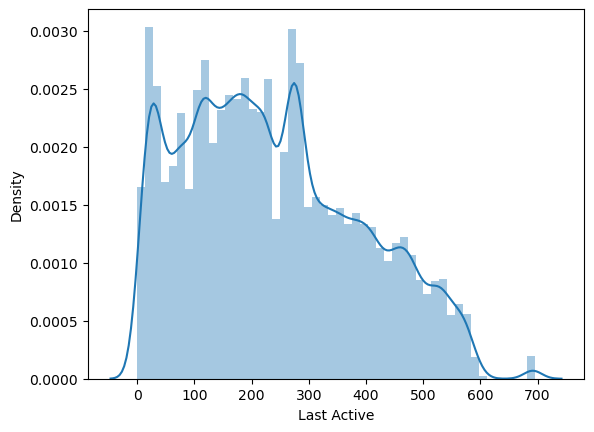

In [1130]:
sns.distplot(RFM['Last Active'])

In [975]:
# Median
RFM['Last Active'].median()

220.0

### Threshhold of Recency Mean i.e 238 days

In [976]:
RFM['Churn'] = RFM['Last Active'].apply(lambda x: 1 if x > RFM['Last Active'].median() else 0)
RFM.head()

,customer_unique_id,Last Active,Frequency,Total_payment_value,Recency Label,Frequency Label,Monetary Label,Rank,rank_rm,Churn
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.900000,4,1,3,"(4, 1, 3)","(4, 3)",0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.190000,4,1,1,"(4, 1, 1)","(4, 1)",0
2,0000f46a3911fa3c0805444483337064,537,1,86.220000,1,1,2,"(1, 1, 2)","(1, 2)",1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.620000,2,1,1,"(2, 1, 1)","(2, 1)",1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.890000,2,1,4,"(2, 1, 4)","(2, 4)",1


In [977]:
RFM['Churn'].value_counts()

0    45203
1    44952
Name: Churn, dtype: int64

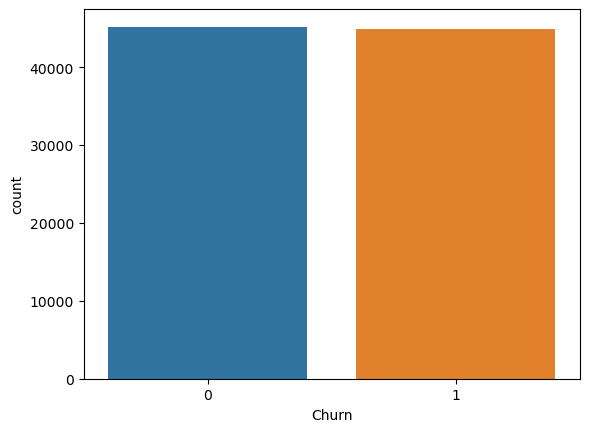

In [978]:
sns.countplot(RFM['Churn'])
plt.show()

### **Churn 0** means Customer has retain. 

### **Churn 1** means Customer has move.

<a id="finaldf"></a>
# 10. Merging the Dataframe into final Dataframe

In [979]:
finaldata = RFM.merge(final,on='customer_unique_id',how='inner')

Features Last Active and Recency Label are the feature that are been used to derive so it should be dropped. 

In [980]:
finaldata.drop(['Recency Label','Last Active'],axis=1,inplace=True)

In [981]:
finaldata.shape

(90155, 34)

In [982]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90155 entries, 0 to 90154
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_unique_id             90155 non-null  object 
 1   Frequency                      90155 non-null  int64  
 2   Total_payment_value            90155 non-null  float64
 3   Frequency Label                90155 non-null  int64  
 4   Monetary Label                 90155 non-null  int64  
 5   Rank                           90155 non-null  object 
 6   rank_rm                        90155 non-null  object 
 7   Churn                          90155 non-null  int64  
 8   customer_zip_code_prefix       90155 non-null  int64  
 9   customer_city                  90155 non-null  object 
 10  customer_state                 90155 non-null  object 
 11  order_id                       90155 non-null  int64  
 12  purchased_approved             90155 non-null 

<a id="fe"></a>
# 11. Feature Engineering

1)
**These features are created at the time of basic EDA.**

'purchased_approved',   'approved_carrier',   'carrier_delivered',   'delivered_estimated',     'purchased_delivered'


2)
**Product length , width , Height can be combined and Volume can be derived from these columns**

In [983]:
finaldata['Volume_in_m'] = (finaldata['product_length_cm']*finaldata['product_height_cm']\
                            *finaldata['product_width_cm'])/1000000

In [984]:
finaldata['Volume_in_m'].describe()

count   90155.000000
mean        0.082833
std         6.075777
min         0.000168
25%         0.002944
50%         0.007500
75%         0.020944
max      1480.262850
Name: Volume_in_m, dtype: float64

3)
**Product_category_name_english - It has the product name in english language . Hence we can perform binig and check the correlation**

### Step 1 : Define a function for the product name 
        9 categories will be created.
 #### Step 2: Pass the function in the column

In [985]:
def product_binning(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

In [986]:
finaldata['Product_type'] = finaldata['product_category_name_english'].apply(product_binning)

In [987]:
finaldata.groupby(['Product_type'])['Churn'].count()

Product_type
Beauty & Health            11152
Books & Stationery          2931
Electronics                24679
Entertainment              11318
Fashion                     8116
Food & Drinks                874
Furniture                  19859
Home & Garden              10012
Industry & Construction     1214
Name: Churn, dtype: int64

### Distribution of Product Type

<AxesSubplot:>

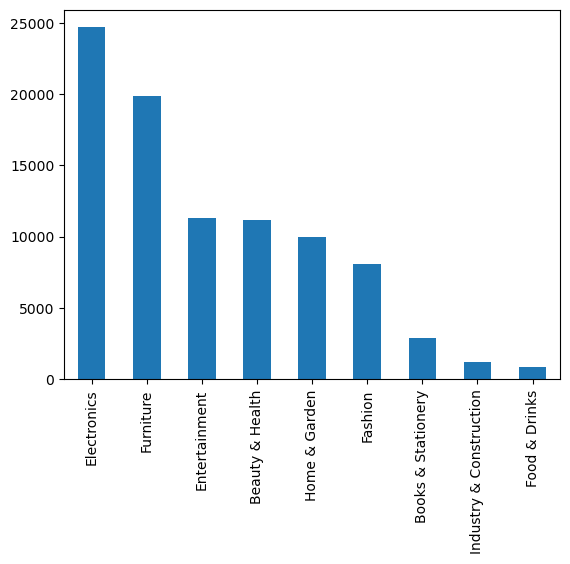

In [988]:
finaldata['Product_type'].value_counts().plot(kind='bar')
# Electronics is the mostly purchased category & Food and Drinks is the least purchasing category

4)
**Delivered Estimated is the feature which display the number of days differnce between Estimated delivery time shown to customers and actual delivery to them**
 
So it does mean that if the delivered estimaed is less than Zero(0) it means that order delivery has been `Delayed Delivery`.
If the number of days is zero or positive it implies the `ON-TIME OR BEFORE- TIME DELIVERY`.

Binning the column into two - Delayed or Not Delayed Delivery

In [989]:
def time_delivery_analysis(x):
    if x < 0 :
        return ('Delayed ')
    else : 
        return('Not Delayed ')

In [990]:
finaldata['Delivery Status'] = finaldata['delivered_estimated'].apply(time_delivery_analysis)

In [991]:
finaldata['Delivery Status'].value_counts()

Not Delayed     82700
Delayed          7455
Name: Delivery Status, dtype: int64

**Inference**

**Company is doing well in terms of product delivery time . More than 90% of the orders are delivered before or on time.**

5) **Total Order**

**After placing order customer has to pay total order which is sum of price and freight value**

In [992]:
finaldata['Total_order'] = finaldata['price']+finaldata['freight_value']

In [993]:
finaldata['Total_order'].describe()

count   90155.000000
mean      173.226534
std       258.127179
min        10.070000
25%        64.000000
50%       110.180000
75%       188.550000
max     13664.080000
Name: Total_order, dtype: float64

6)  **Pending payment** 

**When a customer place an order he is entitled to pay the charges of the prodct and delivery charges . 
In the data many customers have opted the option for payment installments.
So after deduction `Total Order - Payment value` Pending payment will get.**

In [994]:
finaldata['Pending_amount'] = finaldata['Total_order']-finaldata['Total_payment_value']

In [995]:
finaldata['Pending_amount'].describe()

count   90155.000000
mean        7.373279
std       102.031563
min      -182.810000
25%         0.000000
50%         0.000000
75%         0.000000
max     10370.640000
Name: Pending_amount, dtype: float64

**Inference**

Negative value -182 shows that they have paid interest on the installments. 

Positive values shows that there are customers who are yet to pay the amount 

The columns which are used for **Feature Engineering** has now no role for the model purpose.
Hence dropping the columns 

In [996]:
finaldata.columns

Index(['customer_unique_id', 'Frequency', 'Total_payment_value',
       'Frequency Label', 'Monetary Label', 'Rank', 'rank_rm', 'Churn',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'purchased_approved ', 'delivered_estimated',
       'purchased_delivered', 'carrier_delivered', 'approved_carrier',
       'product_id', 'order_item_id', 'seller_id', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'price', 'freight_value',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'payment_type', 'payment_installments',
       'payment_value', 'review_score', 'product_category_name_english',
       'Volume_in_m', 'Product_type', 'Delivery Status', 'Total_order',
       'Pending_amount'],
      dtype='object')

In [997]:
# Customer unique id is of no use as it is unique for every customer.
finaldata.drop(['customer_unique_id','product_length_cm','product_height_cm','product_width_cm',\
                'product_category_name_english','payment_value'],axis=1,inplace=True)

### Data Type Correction 

In [998]:
finaldata.select_dtypes(include=np.number).columns

Index(['Frequency', 'Total_payment_value', 'Frequency Label', 'Monetary Label',
       'Churn', 'customer_zip_code_prefix', 'order_id', 'purchased_approved ',
       'delivered_estimated', 'purchased_delivered', 'carrier_delivered',
       'approved_carrier', 'product_id', 'order_item_id',
       'seller_zip_code_prefix', 'price', 'freight_value', 'product_weight_g',
       'payment_installments', 'review_score', 'Volume_in_m', 'Total_order',
       'Pending_amount'],
      dtype='object')

In [999]:
finaldata['Frequency Label'] = finaldata['Frequency Label'].astype('object')
finaldata['Monetary Label'] = finaldata['Monetary Label'].astype('object')
finaldata['Churn'] = finaldata['Churn'].astype('object')
finaldata['Frequency'] = finaldata['Frequency'].astype('object')
finaldata['order_item_id'] = finaldata['order_item_id'].astype('object')
finaldata['order_id'] = finaldata['order_id'].astype('object')
finaldata['customer_zip_code_prefix'] = finaldata['customer_zip_code_prefix'].astype('object')
finaldata['review_score'] = finaldata['review_score'].astype('object')
finaldata['seller_zip_code_prefix'] = finaldata['seller_zip_code_prefix'].astype('object')
finaldata['product_id'] = finaldata['product_id'].astype('object')
finaldata['payment_installments'] = finaldata['payment_installments'].astype('object')

<a id="out"></a>
# 12. Treatment of Outliers

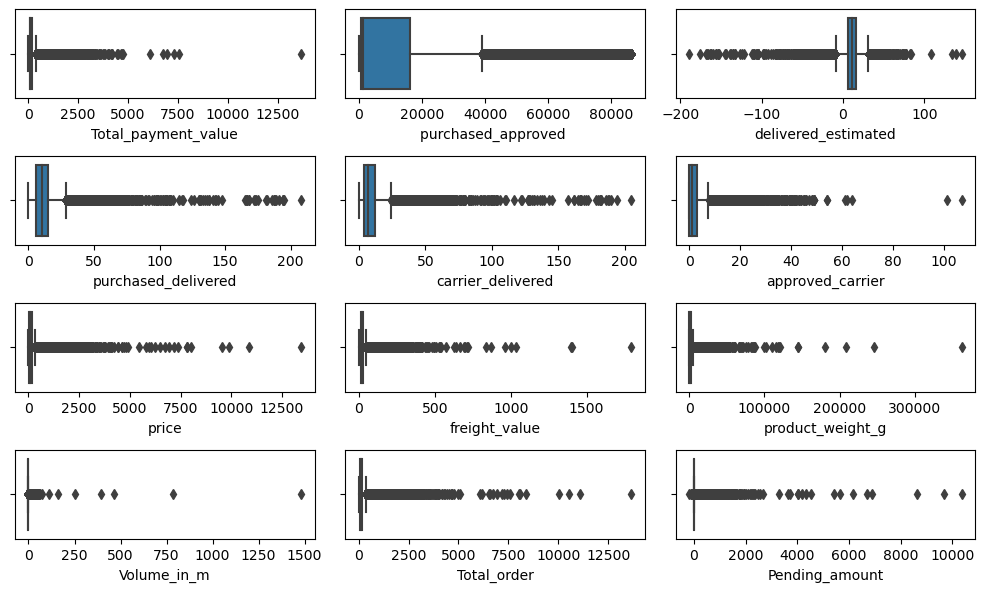

In [1000]:
t = 1
plt.figure(figsize=(10,10))
for i in finaldata.select_dtypes(include=np.number):
    plt.subplot(7,3,t)
    sns.boxplot(finaldata[i])
    t += 1
plt.tight_layout()
plt.show()

### Strategy to deal with outliers 

1) Identify outliers in the dataset.

2) Decide on a treatment strategy (remove, transform, winsorize, impute, or treat separately).

3) Apply the chosen treatment to the outliers.

4) Reanalyze the data and assess the impact of the treatment.

5) Document and justify the steps taken for outlier treatment.

In [1001]:
# Firstly we will analyse the extreme outliers and will remove them.

In [1002]:
finaldata[finaldata['Total_payment_value']>8000]

,Frequency,Total_payment_value,Frequency Label,Monetary Label,Rank,rank_rm,Churn,customer_zip_code_prefix,customer_city,customer_state,order_id,purchased_approved,delivered_estimated,purchased_delivered,carrier_delivered,approved_carrier,product_id,order_item_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,price,freight_value,product_weight_g,payment_type,payment_installments,review_score,Volume_in_m,Product_type,Delivery Status,Total_order,Pending_amount
3608,1,13664.080000,1,4,"(2, 1, 4)","(2, 4)",1,20080,rio de janeiro,RJ,1,208.000000,5.000000,18.000000,7.000000,8.000000,1,8.000000,b37c4c02bda3161a7546a4e6d222d5b2,3667,sao paulo,SP,13440.000000,224.080000,750.000000,credit_card,1,1.000000,0.004096,Electronics,Not Delayed,13664.080000,0.000000


In [1003]:
# Removing One records for the Total payment value
finaldata.drop(index=[3608],inplace=True)

In [1004]:
finaldata[finaldata['approved_carrier']>65]

,Frequency,Total_payment_value,Frequency Label,Monetary Label,Rank,rank_rm,Churn,customer_zip_code_prefix,customer_city,customer_state,order_id,purchased_approved,delivered_estimated,purchased_delivered,carrier_delivered,approved_carrier,product_id,order_item_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,price,freight_value,product_weight_g,payment_type,payment_installments,review_score,Volume_in_m,Product_type,Delivery Status,Total_order,Pending_amount
31377,1,1354.090000,1,4,"(2, 1, 4)","(2, 4)",1,11390,sao vicente,SP,1,984.000000,-81.000000,107.000000,0.000000,107.000000,1,1.000000,9b522ba7eae9e1d04082f267144583cc,4843,sao paulo,SP,1259.000000,95.090000,3000.000000,credit_card,10,4.000000,0.269500,Furniture,Delayed,1354.090000,0.000000
75773,1,56.970000,1,1,"(2, 1, 1)","(2, 1)",1,9571,sao caetano do sul,SP,1,81753.000000,-92.000000,105.000000,1.000000,101.000000,1,1.000000,e09887ca8c7bf8a4621ce481820414ef,8431,sao paulo,SP,39.990000,9.340000,600.000000,credit_card,5,1.000000,0.019200,Furniture,Delayed,49.330000,-7.640000


In [1005]:
# Removing two records for the approved carrier
finaldata.drop(index=[31377,75773],inplace=True)

In [1006]:
finaldata[finaldata['price']>8000]

,Frequency,Total_payment_value,Frequency Label,Monetary Label,Rank,rank_rm,Churn,customer_zip_code_prefix,customer_city,customer_state,order_id,purchased_approved,delivered_estimated,purchased_delivered,carrier_delivered,approved_carrier,product_id,order_item_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,price,freight_value,product_weight_g,payment_type,payment_installments,review_score,Volume_in_m,Product_type,Delivery Status,Total_order,Pending_amount
47023,1,879.440000,1,4,"(3, 1, 4)","(3, 4)",0,12940,atibaia,SP,1,71628.000000,8.000000,14.000000,5.000000,1.000000,1,2.000000,e59aa562b9f8076dd550fcddf0e73491,82810,curitiba,PR,9888.000000,665.280000,36000.000000,voucher,5,5.000000,31.104000,Industry & Construction,Not Delayed,10553.280000,9673.840000
67144,1,1436.460000,1,4,"(4, 1, 4)","(4, 4)",0,95012,caxias do sul,RS,1,53634.000000,15.000000,10.000000,10.000000,0.000000,1,1.000000,d03698c2efd04a549382afa6623e27fb,45658,ilheus,BA,9520.140000,535.080000,13300.000000,voucher,1,5.000000,1.783600,Electronics,Not Delayed,10055.220000,8618.760000
69332,1,740.760000,1,4,"(1, 1, 4)","(1, 4)",1,5726,sao paulo,SP,1,1121.000000,7.000000,3.000000,2.000000,0.000000,1,1.000000,7b0df942f46435babab05d49b744b2c4,12924,braganca paulista,SP,10856.100000,255.300000,54000.000000,voucher,1,5.000000,27.945000,Electronics,Not Delayed,11111.400000,10370.640000


In [1007]:
## Dropping three record on the basis of price
finaldata.drop(index=[47023,67144,69332],inplace=True)

In [1008]:
finaldata[finaldata['freight_value']>1200]

,Frequency,Total_payment_value,Frequency Label,Monetary Label,Rank,rank_rm,Churn,customer_zip_code_prefix,customer_city,customer_state,order_id,purchased_approved,delivered_estimated,purchased_delivered,carrier_delivered,approved_carrier,product_id,order_item_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,price,freight_value,product_weight_g,payment_type,payment_installments,review_score,Volume_in_m,Product_type,Delivery Status,Total_order,Pending_amount
17014,1,529.550000,1,4,"(4, 1, 4)","(4, 4)",0,77001,palmas,TO,1,2688.000000,13.000000,13.000000,7.000000,6.000000,1,1.000000,6b333a05bf188ef3e1f1662a86bd9855,72304,brasilia,DF,6019.860000,1393.840000,362600.000000,voucher,1,5.000000,393.818880,Home & Garden,Not Delayed,7413.700000,6884.150000
54389,2,233.490000,2,4,"(1, 2, 4)","(1, 4)",1,3227,sao paulo,SP,2,1184.727273,14.000000,5.000000,2.545455,2.090909,2,3.000000,822166ed1e47908f7cfb49946d03c726,25803,tres rios,SP,2847.780000,1405.980000,208500.000000,voucher,1,5.000000,1480.262850,Furniture,Not Delayed,4253.760000,4020.270000
90144,1,2844.960000,1,4,"(4, 1, 4)","(4, 4)",0,58407,campina grande,PB,1,84260.000000,15.000000,13.000000,10.000000,0.000000,1,6.000000,56e361f411e38dcef17cdc2a3d99628b,7113,guarulhos,SP,1050.000000,1794.960000,18700.000000,boleto,1,5.000000,0.136080,Electronics,Not Delayed,2844.960000,0.000000


In [1009]:
# Dropping three records on the basis of the freight value
finaldata.drop(index=[17014,54389,90144],inplace=True)

In [1010]:
finaldata[finaldata['product_weight_g']>150000]

,Frequency,Total_payment_value,Frequency Label,Monetary Label,Rank,rank_rm,Churn,customer_zip_code_prefix,customer_city,customer_state,order_id,purchased_approved,delivered_estimated,purchased_delivered,carrier_delivered,approved_carrier,product_id,order_item_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,price,freight_value,product_weight_g,payment_type,payment_installments,review_score,Volume_in_m,Product_type,Delivery Status,Total_order,Pending_amount
13352,1,86.990000,1,2,"(3, 1, 2)","(3, 2)",0,28913,cabo frio,RJ,1,62066.000000,42.000000,13.000000,9.000000,3.000000,1,1.000000,6481e96574816ead57975da2c0f6d80d,18072,sorocaba,SP,855.000000,449.850000,246000.000000,voucher,1,5.000000,785.862000,Industry & Construction,Not Delayed,1304.850000,1217.860000
89250,1,1085.300000,1,4,"(1, 1, 4)","(1, 4)",1,24220,niteroi,RJ,1,0.000000,13.000000,11.000000,8.000000,2.000000,1,1.000000,ccb83a794700270fde70898fe9ff368b,88960,sombrio,SC,5814.000000,697.800000,180000.000000,voucher,1,5.000000,43.560720,Entertainment,Not Delayed,6511.800000,5426.500000


In [1011]:
# Dropping two records on the basis of the product weight
finaldata.drop(index=[13352,89250],inplace=True)

In [1012]:
finaldata[finaldata['Volume_in_m']>200]

,Frequency,Total_payment_value,Frequency Label,Monetary Label,Rank,rank_rm,Churn,customer_zip_code_prefix,customer_city,customer_state,order_id,purchased_approved,delivered_estimated,purchased_delivered,carrier_delivered,approved_carrier,product_id,order_item_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,price,freight_value,product_weight_g,payment_type,payment_installments,review_score,Volume_in_m,Product_type,Delivery Status,Total_order,Pending_amount
39382,1,205.740000,1,4,"(2, 1, 4)","(2, 4)",1,23070,rio de janeiro,RJ,1,10076.000000,4.000000,25.000000,15.000000,7.000000,1,2.000000,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,3039.620000,869.440000,98800.000000,voucher,1,5.000000,250.010550,Furniture,Not Delayed,3909.060000,3703.320000
87984,2,521.070000,2,4,"(1, 2, 4)","(1, 4)",1,7131,guarulhos,SP,2,0.000000,8.000000,14.347826,10.304348,4.043478,2,2.000000,df560393f3a51e74553ab94004ba5c87,87900,uberlandia,PR,5436.500000,720.670000,82900.000000,voucher,3,3.521739,464.118680,Furniture,Not Delayed,6157.170000,5636.100000


In [1013]:
# Dropping two records on the basis of the product volume
finaldata.drop(index=[39382,87984],inplace=True)

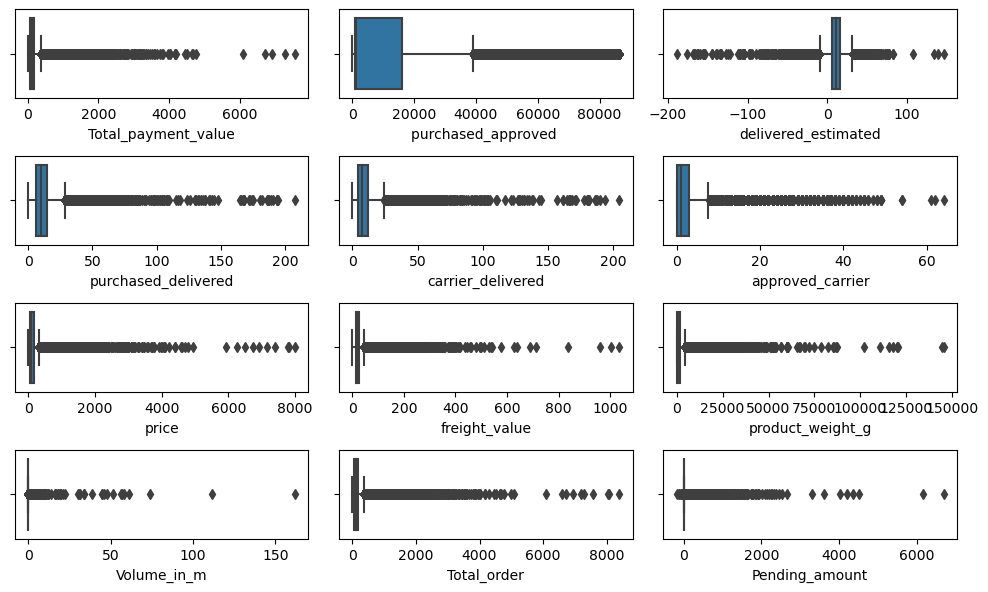

In [1014]:
# Lets Visualize the Outliers again
t = 1
plt.figure(figsize=(10,10))
for i in finaldata.select_dtypes(include=np.number):
    plt.subplot(7,3,t)
    sns.boxplot(finaldata[i])
    t += 1
plt.tight_layout()
plt.show()

**From the above now there is no extreme outliers.**

**Further we will apply transformation techniques to the remaining outliers.**

<a id="edafinal"></a>
# 13. Bivariate Analysis

In [1015]:
finaldata.head()

,Frequency,Total_payment_value,Frequency Label,Monetary Label,Rank,rank_rm,Churn,customer_zip_code_prefix,customer_city,customer_state,order_id,purchased_approved,delivered_estimated,purchased_delivered,carrier_delivered,approved_carrier,product_id,order_item_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,price,freight_value,product_weight_g,payment_type,payment_installments,review_score,Volume_in_m,Product_type,Delivery Status,Total_order,Pending_amount
0,1,141.900000,1,3,"(4, 1, 3)","(4, 3)",0,7787,cajamar,SP,1,891.000000,4.000000,6.000000,4.000000,1.000000,1,1.000000,da8622b14eb17ae2831f4ac5b9dab84a,13405,piracicaba,SP,129.900000,12.000000,1500.000000,credit_card,8,5.000000,0.007616,Furniture,Not Delayed,141.900000,0.000000
1,1,27.190000,1,1,"(4, 1, 1)","(4, 1)",0,6053,osasco,SP,1,26057.000000,4.000000,3.000000,1.000000,1.000000,1,1.000000,138dbe45fc62f1e244378131a6801526,2215,sao paulo,SP,18.900000,8.290000,375.000000,credit_card,1,4.000000,0.005148,Beauty & Health,Not Delayed,27.190000,-0.000000
2,1,86.220000,1,2,"(1, 1, 2)","(1, 2)",1,88115,sao jose,SC,1,0.000000,1.000000,25.000000,23.000000,2.000000,1,1.000000,3d871de0142ce09b7081e2b9d1733cb1,13232,campo limpo paulista,SP,69.000000,17.220000,1500.000000,credit_card,8,3.000000,0.043750,Books & Stationery,Not Delayed,86.220000,0.000000
3,1,43.620000,1,1,"(2, 1, 1)","(2, 1)",1,66812,belem,PA,1,1176.000000,11.000000,20.000000,19.000000,0.000000,1,1.000000,ef506c96320abeedfb894c34db06f478,3569,sao paulo,SP,25.990000,17.630000,150.000000,credit_card,4,4.000000,0.001045,Electronics,Not Delayed,43.620000,0.000000
4,1,196.890000,1,4,"(2, 1, 4)","(2, 4)",1,18040,sorocaba,SP,1,1270.000000,7.000000,13.000000,11.000000,1.000000,1,1.000000,70a12e78e608ac31179aea7f8422044b,12327,jacarei,SP,180.000000,16.890000,6050.000000,credit_card,6,5.000000,0.000528,Electronics,Not Delayed,196.890000,0.000000


In [1016]:
finaldata.groupby('Churn').describe().T

Churn                                 0             1
Total_payment_value count  45198.000000  44944.000000
                    mean     167.041762    164.180039
                    std      222.775269    221.023816
                    min        9.590000     10.070000
                    25%       63.072500     63.100000
                    50%      109.635000    106.160000
                    75%      185.660000    181.550000
                    max     7274.880000   7571.630000
purchased_approved  count  45198.000000  44944.000000
                    mean   14717.608534  13127.945206
                    std    24182.406094  22516.459372
                    min        0.000000      0.000000
                    25%      850.000000    691.000000
                    50%     1359.000000    966.000000
                    75%    18943.000000  13047.500000
                    max    86399.000000  86399.000000
delivered_estimated count  45198.000000  44944.000000
                    mean       9.956679     11.488831
                    std       10.194390      9.988294
                    min     -189.000000   -176.000000
                    25%        5.000000      7.000000
                    50%       10.000000     12.000000
                    75%       15.000000     16.000000
                    max      146.000000    139.000000
purchased_delivered count  45198.000000  44944.000000
                    mean      11.588987     12.646469
                    std        9.299705      9.621148
                    min        0.000000      0.000000
                    25%        6.000000      7.000000
                    50%        9.000000     11.000000
                    75%       15.000000     16.000000
                    max      208.000000    195.000000
carrier_delivered   count  45198.000000  44944.000000
                    mean       8.643619      9.142278
                    std        8.625789      8.730889
                    min        0.000000      0.000000
                    25%        3.000000      4.000000
                    50%        6.000000      7.000000
                    75%       11.000000     12.000000
                    max      205.000000    194.000000
approved_carrier    count  45198.000000  44944.000000
                    mean       2.086694      2.582288
                    std        3.080357      3.660409
                    min        0.000000      0.000000
                    25%        0.000000      0.000000
                    50%        1.000000      2.000000
                    75%        3.000000      3.000000
                    max       49.000000     64.000000
price               count  45198.000000  44944.000000
                    mean     147.688638    147.771396
                    std      228.333057    232.787445
                    min        0.850000      2.290000
                    25%       48.000000     49.000000
                    50%       89.990000     89.900000
                    75%      159.490000    159.900000
                    max     7798.000000   7998.000000
freight_value       count  45198.000000  44944.000000
                    mean      25.321359     23.961196
                    std       26.355789     23.722392
                    min        0.000000      0.000000
                    25%       13.860000     14.110000
                    50%       18.300000     16.950000
                    75%       26.980000     26.160000
                    max      961.280000   1035.960000
product_weight_g    count  45198.000000  44944.000000
                    mean    2162.230054   2412.106444
                    std     4128.891760   4633.680501
                    min        0.000000     50.000000
                    25%      292.000000    300.000000
                    50%      650.000000    800.000000
                    75%     1850.000000   2100.000000
                    max   120300.000000 145200.000000
Volume_in_m         count  45198.000000  44944.000000
    

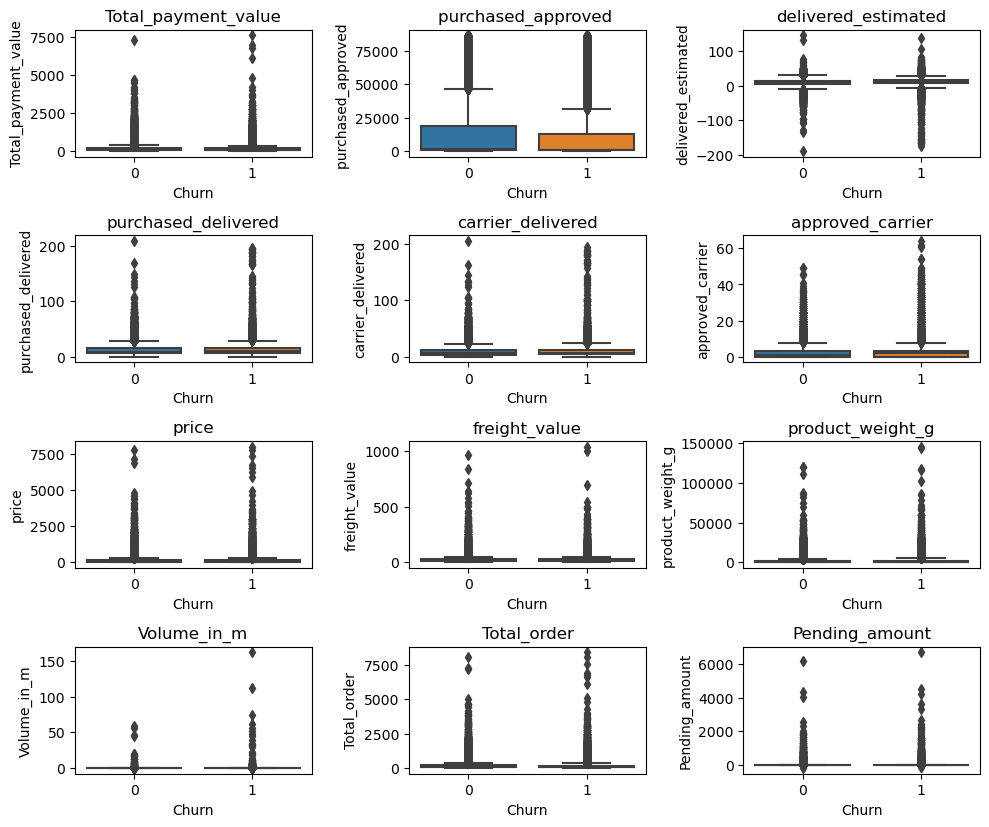

In [1017]:
t = 1
plt.figure(figsize=(10,10))
for i in finaldata.select_dtypes(include=np.number).columns:
    plt.subplot(5,3,t)
    sns.boxplot(finaldata['Churn'],finaldata[i])
    plt.title(i)
    t += 1
plt.tight_layout()
plt.show()

**Dropping Rank columns as it is not required for further model purpose.**

In [1018]:
finaldata.drop(['rank_rm','Rank'],axis=1,inplace=True)

<a id="targetImbalance"></a>
## 13.1. Target imbalance

In [1019]:
RFM['Churn'].value_counts()

0    45203
1    44952
Name: Churn, dtype: int64

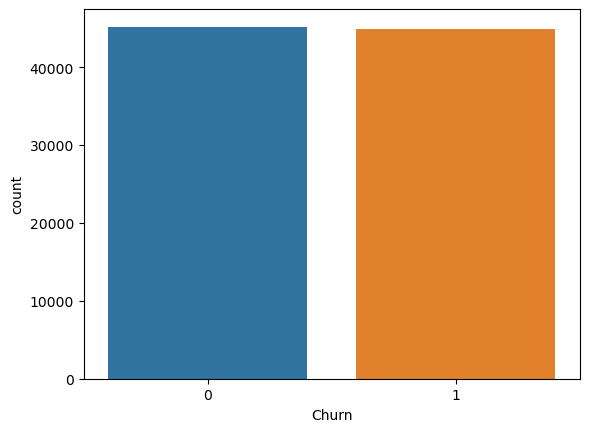

In [1020]:
sns.countplot(RFM['Churn'])
plt.show()

**Target is almost equally balanced. No need to apply OverSampling or ADAYSN Technique.**

<a id="multivariate"></a>
## 13.2. Multivariate Analysis

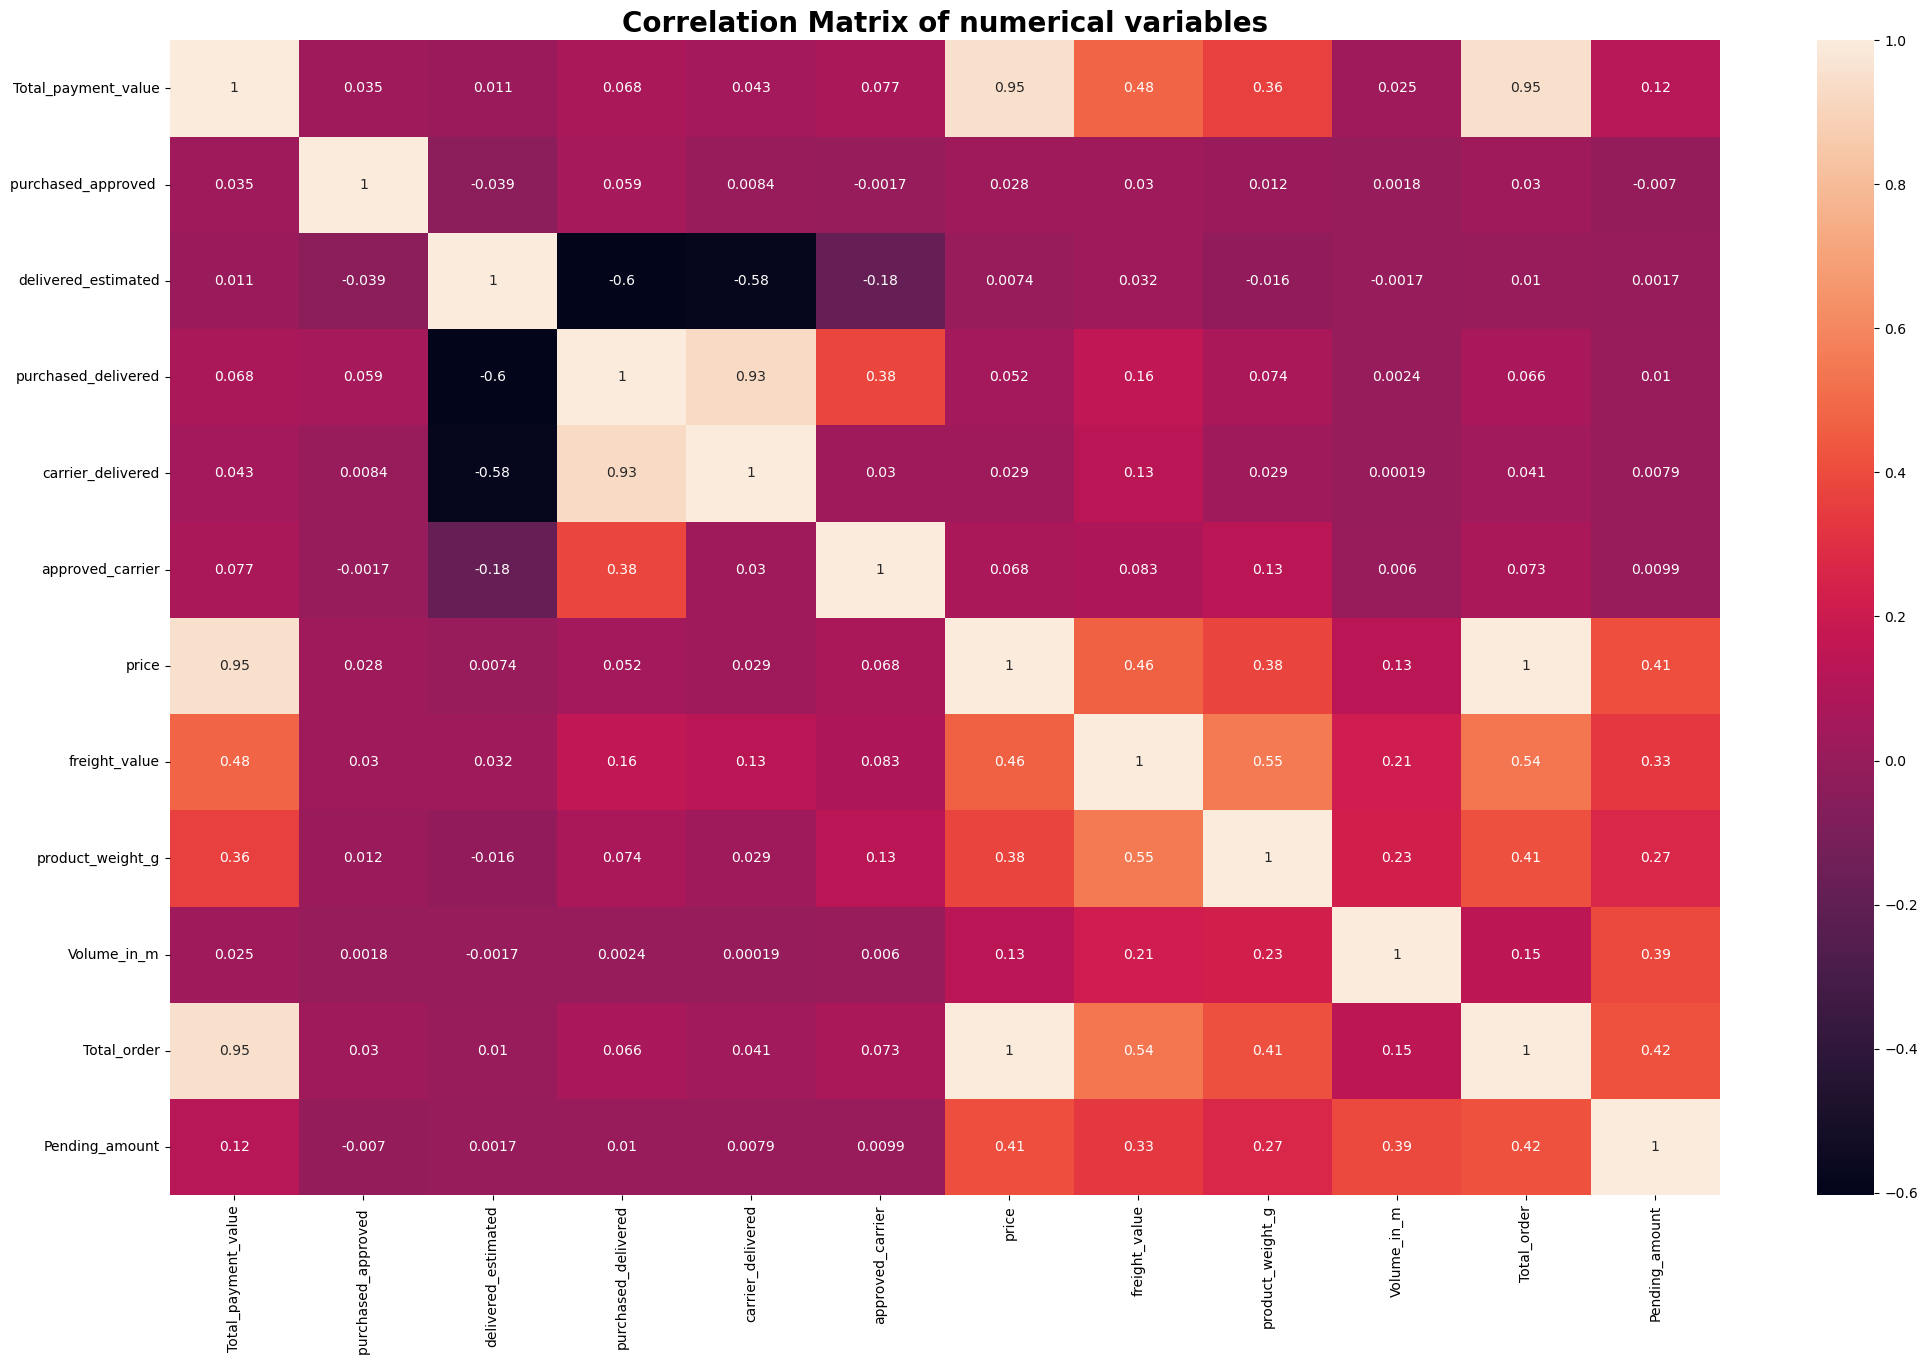

In [1021]:
plt.figure(figsize=(25,15))
sns.heatmap(finaldata.corr(), annot = True)
plt.title('Correlation Matrix of numerical variables',fontsize=20,fontweight='bold')
plt.show()

In [1022]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1023]:
df_vif.sort_values('VIF',ascending=False)

,Features,VIF
23,Total_order,196.024486
1,Total_payment_value,102.370773
16,price,95.499586
19,payment_installments,56.670063
22,Product_type,47.106812
2,Monetary Label,19.374213
8,purchased_delivered,12.937197
9,carrier_delivered,10.768096
20,review_score,6.595637
15,seller_state,5.511088


<a id="stats"></a>
# 14. Statistical Tests

In [1024]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

## Numerical vs Categorical

In [1025]:
for i in finaldata.select_dtypes(include=np.number).columns:
    x1 = finaldata[finaldata['Churn']==0][i]
    x2 = finaldata[finaldata['Churn']==1][i]
    teststats , pvalue = stats.ttest_ind(x1,x2)
    if pvalue < 0.05 :
        print(i,'is significant')
    else:
        print(i,' is insignificant column')

Total_payment_value  is insignificant column
purchased_approved  is significant
delivered_estimated is significant
purchased_delivered is significant
carrier_delivered is significant
approved_carrier is significant
price  is insignificant column
freight_value is significant
product_weight_g is significant
Volume_in_m is significant
Total_order  is insignificant column
Pending_amount is significant


#### total_payment_value and price and total order is insignificant columns, we will drop these columns not now.

## Categorical vs Categorical 

In [1026]:
for i in finaldata.select_dtypes(include='object').columns:
    table = pd.crosstab(finaldata[i],finaldata['Churn'])
    chi2, pvalue, _, _ = chi2_contingency(table)
    if pvalue < 0.05:
        print(i,'is significant')
    else:
        print(i,' is insignificant column')

Frequency is significant
Frequency Label is significant
Monetary Label is significant
Churn is significant
customer_zip_code_prefix is significant
customer_city is significant
customer_state is significant
order_id is significant
product_id is significant
order_item_id is significant
seller_id is significant
seller_zip_code_prefix is significant
seller_city is significant
seller_state is significant
payment_type is significant
payment_installments is significant
review_score is significant
Product_type is significant
Delivery Status is significant


In [1027]:
# Product id is insignificant column
finaldata.drop(['product_id','order_id','Frequency Label'],axis=1,inplace=True)
# Order Id is same as Frequency so dropping Order Id 

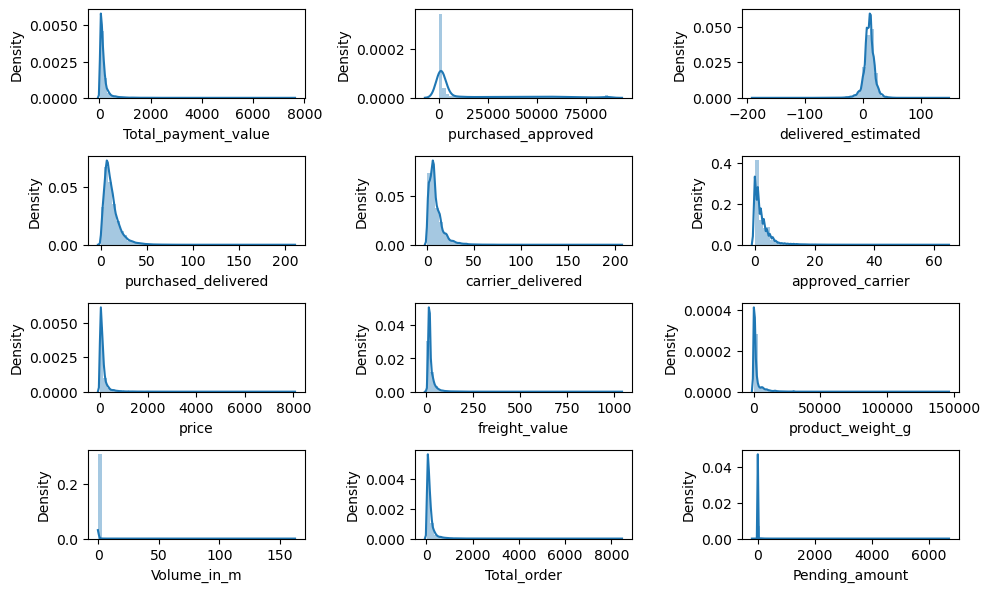

In [1028]:
t = 1
plt.figure(figsize=(10,10))
for i in finaldata.select_dtypes(include=np.number):
    plt.subplot(7,3,t)
    sns.distplot(finaldata[i])
    t += 1
plt.tight_layout()
plt.show()

,Frequency,Total_payment_value,Monetary Label,Churn,customer_zip_code_prefix,customer_city,customer_state,purchased_approved,delivered_estimated,purchased_delivered,carrier_delivered,approved_carrier,order_item_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,price,freight_value,product_weight_g,payment_type,payment_installments,review_score,Volume_in_m,Product_type,Delivery Status,Total_order,Pending_amount
0,1,141.900000,3,0,7787,cajamar,SP,891.000000,4.000000,6.000000,4.000000,1.000000,1.000000,da8622b14eb17ae2831f4ac5b9dab84a,13405,piracicaba,SP,129.900000,12.000000,1500.000000,credit_card,8,5.000000,0.007616,Furniture,Not Delayed,141.900000,0.000000
1,1,27.190000,1,0,6053,osasco,SP,26057.000000,4.000000,3.000000,1.000000,1.000000,1.000000,138dbe45fc62f1e244378131a6801526,2215,sao paulo,SP,18.900000,8.290000,375.000000,credit_card,1,4.000000,0.005148,Beauty & Health,Not Delayed,27.190000,-0.000000
2,1,86.220000,2,1,88115,sao jose,SC,0.000000,1.000000,25.000000,23.000000,2.000000,1.000000,3d871de0142ce09b7081e2b9d1733cb1,13232,campo limpo paulista,SP,69.000000,17.220000,1500.000000,credit_card,8,3.000000,0.043750,Books & Stationery,Not Delayed,86.220000,0.000000
3,1,43.620000,1,1,66812,belem,PA,1176.000000,11.000000,20.000000,19.000000,0.000000,1.000000,ef506c96320abeedfb894c34db06f478,3569,sao paulo,SP,25.990000,17.630000,150.000000,credit_card,4,4.000000,0.001045,Electronics,Not Delayed,43.620000,0.000000
4,1,196.890000,4,1,18040,sorocaba,SP,1270.000000,7.000000,13.000000,11.000000,1.000000,1.000000,70a12e78e608ac31179aea7f8422044b,12327,jacarei,SP,180.000000,16.890000,6050.000000,credit_card,6,5.000000,0.000528,Electronics,Not Delayed,196.890000,0.000000


<a id="nct"></a>
# 15. Treatment of Numerical Columns

### Scaling/Transformations

### Scaling is applied to:

1)Ensure variables are on a comparable scale.

2)Prevent variables with larger magnitudes from dominating analysis.

3)Improve the performance of certain machine learning algorithms that are sensitive to the scale of the input features.

4)Facilitate interpretation and visualization of data.

### Data transformation is applied to:

1)Normalize non-normal distributions.

2)Achieve constant variance (homoscedasticity).

3)Reduce skewness in skewed data.

4)Mitigate the impact of outliers.

5)Stabilize variance with changing means.

6)Satisfy assumptions of statistical tests or models.

#### All the varaibles in the final data are skewed and not normally distriuted means that there are outliers.
#### To overcome the impact on outliers we will apply Box-cox transformation (Power Transformer)

**Power transformation (Box-Cox) is applied to:**
    The data when we are having positive values , power transformation will work better.
    It is updated form of lof transformation

In [1029]:
from sklearn import preprocessing

In [ ]:
y=

In [ ]:
X_train,X_test,y_train,y_test=train_test_split()

<a id="trans"></a>
## 15.1. Transformation of Numerical Columns

In [440]:
from sklearn.preprocessing import PowerTransformer

In [441]:
# Total payment value is the column with positive value so will apply box-cox tranformation

In [442]:
pt = PowerTransformer(method='box-cox')
for i in finaldata.select_dtypes(include=np.number).columns:
    if i  in ['Total_payment_value']:
                finaldata[i] = pt.fit_transform(finaldata[[i]])

In [443]:
# Features other than Total payment value almost starts with zero so will apply yeo-johnson transformation

In [444]:
pt = PowerTransformer(method='yeo-johnson')
for i in finaldata.select_dtypes(include=np.number).columns:
    if i not in ['Total_payment_value']:
                finaldata[i] = pt.fit_transform(finaldata[[i]])

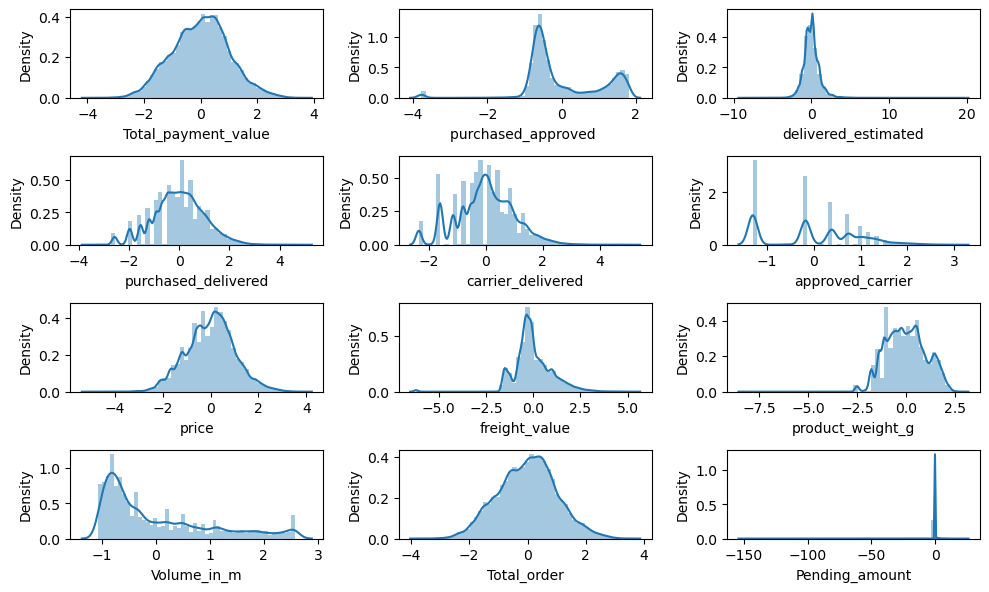

In [445]:
t = 1
plt.figure(figsize=(10,10))
for i in finaldata.select_dtypes(include=np.number):
    plt.subplot(7,3,t)
    sns.distplot(finaldata[i])
    t += 1
plt.tight_layout()
plt.show()

<a id="cct"></a>
# 16. Treatment of Categorical Columns

To treat the categorical columns following encoding can be performed:

1)One-Hot Encoding

2)Label Encoding

3)Ordinal Encoding

4)Frequency Encoding

5)Target Encoding

In [446]:
finaldata.select_dtypes(include='object').nunique()

Frequency                       9
Monetary Label                  4
Churn                           2
customer_zip_code_prefix    14765
customer_city                4052
customer_state                 27
order_item_id                  17
seller_id                    2871
seller_zip_code_prefix       2116
seller_city                   581
seller_state                   22
payment_type                    4
payment_installments           24
review_score                   38
Product_type                    9
Delivery Status                 2
dtype: int64

In [824]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [825]:
finaldata.columns

Index(['Frequency', 'Total_payment_value', 'Frequency Label', 'Monetary Label',
       'Churn', 'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'purchased_approved ', 'delivered_estimated',
       'purchased_delivered', 'carrier_delivered', 'approved_carrier',
       'product_id', 'order_item_id', 'seller_id', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'price', 'freight_value',
       'product_weight_g', 'payment_type', 'payment_installments',
       'review_score', 'Volume_in_m', 'Product_type', 'Delivery Status',
       'Total_order', 'Pending_amount'],
      dtype='object')

In [1071]:
X=finaldata.drop(columns=['seller_city','carrier_delivered','approved_carrier','Churn','customer_city','Volume_in_m'])

In [1072]:
y=finaldata.Churn.astype('int')

In [1073]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

<a id="le"></a>
## 16.1. Label Encoding on Ordinal Categorical Variables

In [1074]:
from sklearn.preprocessing import LabelEncoder

In [1075]:
le = LabelEncoder()
for i in ['Frequency','Monetary Label','review_score','order_item_id']:
    X_train[i] = le.fit_transform (X_train[i])
    X_test[i]=le.fit_transform(X_test[i])

<a id="fe"></a>
## 16.2. Frequency Encoding 

In [1076]:
dict2 = X_train.customer_state.value_counts(normalize=True).to_dict()
dict3 =X_train.seller_state.value_counts(normalize=True).to_dict()
dict5 = X_train.customer_zip_code_prefix.value_counts(normalize=True).to_dict()
dict6 = X_train.seller_zip_code_prefix.value_counts(normalize=True).to_dict()
dict7 = X_train.seller_id.value_counts(normalize=True).to_dict()

In [1077]:

X_train['customer_state'] = X_train['customer_state'].map(dict2)

X_train['seller_state'] = X_train['seller_state'].map(dict3)
X_train['customer_zip_code_prefix'] =X_train['customer_zip_code_prefix'].map(dict5)
X_train['seller_zip_code_prefix'] =X_train['seller_zip_code_prefix'].map(dict6)
X_train['seller_id'] =X_train['seller_id'].map(dict7)

In [1078]:
dict2 = X_test.customer_state.value_counts(normalize=True).to_dict()
dict3 =X_test.seller_state.value_counts(normalize=True).to_dict()
dict5 = X_test.customer_zip_code_prefix.value_counts(normalize=True).to_dict()
dict6 = X_test.seller_zip_code_prefix.value_counts(normalize=True).to_dict()
dict7 = X_test.seller_id.value_counts(normalize=True).to_dict()

In [1079]:

X_test['customer_state'] = X_test['customer_state'].map(dict2)

X_test['seller_state'] = X_test['seller_state'].map(dict3)
X_test['customer_zip_code_prefix'] =X_test['customer_zip_code_prefix'].map(dict5)
X_test['seller_zip_code_prefix'] =X_test['seller_zip_code_prefix'].map(dict6)
X_test['seller_id'] =X_test['seller_id'].map(dict7)

In [1080]:
X_train.columns

Index(['Frequency', 'Total_payment_value', 'Monetary Label',
       'customer_zip_code_prefix', 'customer_state', 'purchased_approved ',
       'delivered_estimated', 'purchased_delivered', 'order_item_id',
       'seller_id', 'seller_zip_code_prefix', 'seller_state', 'price',
       'freight_value', 'product_weight_g', 'payment_type',
       'payment_installments', 'review_score', 'Product_type',
       'Delivery Status', 'Total_order', 'Pending_amount'],
      dtype='object')

<a id="te"></a>
## 16.3. Target Encoding

In [1081]:
d_Xy=pd.concat([X_train.head(),y_train.head()],axis=1)

In [1082]:
d_Xy.head()

,Frequency,Total_payment_value,Monetary Label,customer_zip_code_prefix,customer_state,purchased_approved,delivered_estimated,purchased_delivered,order_item_id,seller_id,seller_zip_code_prefix,seller_state,price,freight_value,product_weight_g,payment_type,payment_installments,review_score,Product_type,Delivery Status,Total_order,Pending_amount,Churn
27922,1,103.690000,1,0.000069,0.034155,19804.000000,7.000000,19.500000,0,0.000610,0.000333,0.712021,69.790000,33.900000,650.000000,credit_card,2,27,Entertainment,Not Delayed,103.690000,0.000000,0
20750,0,255.880000,3,0.000361,0.126843,513.000000,6.000000,13.000000,0,0.003453,0.003453,0.712021,239.000000,16.880000,15267.000000,credit_card,2,21,Electronics,Not Delayed,255.880000,0.000000,1
49379,0,165.030000,2,0.000042,0.020274,31203.000000,8.000000,13.000000,0,0.007294,0.065065,0.712021,143.540000,21.490000,2200.000000,boleto,1,21,Furniture,Not Delayed,165.030000,0.000000,1
37378,0,45.790000,0,0.000028,0.034155,14326.000000,14.000000,13.000000,0,0.019012,0.019123,0.712021,29.000000,16.790000,200.000000,boleto,1,33,Electronics,Not Delayed,45.790000,0.000000,1
18876,0,51.130000,0,0.000125,0.420410,761.000000,15.000000,6.000000,0,0.000887,0.001581,0.077795,35.900000,15.230000,227.000000,credit_card,4,33,Beauty & Health,Not Delayed,51.130000,-0.000000,0


In [1083]:
X_train['payment_installments'] = pd.concat([X_train,y_train],axis=1).groupby(['payment_installments'])['Churn'].transform('mean')
X_train['Product_type'] = pd.concat([X_train,y_train],axis=1).groupby(['Product_type'])['Churn'].transform('mean')

In [1084]:
X_test['payment_installments'] = pd.concat([X_test,y_test],axis=1).groupby(['payment_installments'])['Churn'].transform('mean')
X_test['Product_type'] = pd.concat([X_test,y_test],axis=1).groupby(['Product_type'])['Churn'].transform('mean')

<a id="he"></a>
## 16.4. One-Hot Encoding

In [1085]:
finaldata['payment_type'].value_counts()

credit_card    67475
boleto         17829
voucher         3449
debit_card      1389
Name: payment_type, dtype: int64

In [1086]:
finaldata['Delivery Status'].value_counts()

Not Delayed     82689
Delayed          7453
Name: Delivery Status, dtype: int64

In [1089]:
X_test=pd.get_dummies(columns=["payment_type","Delivery Status"],data=X_test,drop_first=True)

In [1090]:
X_train=pd.get_dummies(columns=["payment_type","Delivery Status"],data=X_train,drop_first=True)

<a id="class"></a>
# 17. Classification Models

In [1094]:
X_train.iloc[:,-1:-5]=X_train.iloc[:,-1:-5].astype('int')

In [1095]:
X_test.iloc[:,-1:-5]=X_test.iloc[:,-1:-5].astype('int')

In [1096]:
X_train.dtypes

Frequency                         int32
Total_payment_value             float64
Monetary Label                    int32
customer_zip_code_prefix        float64
customer_state                  float64
purchased_approved              float64
delivered_estimated             float64
purchased_delivered             float64
order_item_id                     int32
seller_id                       float64
seller_zip_code_prefix          float64
seller_state                    float64
price                           float64
freight_value                   float64
product_weight_g                float64
payment_installments            float64
review_score                      int32
Product_type                    float64
Total_order                     float64
Pending_amount                  float64
payment_type_credit_card          uint8
payment_type_debit_card           uint8
payment_type_voucher              uint8
Delivery Status_Not Delayed       uint8
dtype: object

<a id="traintest"></a>
## 17.1. Train Test Split

In [1049]:
X_train['review_score'].describe()

count   72113.000000
mean       24.758962
std        11.304356
min         0.000000
25%        21.000000
50%        33.000000
75%        33.000000
max        33.000000
Name: review_score, dtype: float64

In [461]:
X = finaldata
y = y.astype(int)

In [462]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=27,test_size=0.3,stratify=y)

In [463]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((63099, 29), (63099,), (27043, 29), (27043,))

<a id="logit"></a>
## 17.2. Logit Regression

In [1097]:
Xc_train=sm.add_constant(X_train)

In [1098]:
model = sm.Logit(y_train,Xc_train).fit()

         Current function value: 0.657797
         Iterations: 35


In [1099]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                72113
Model:                          Logit   Df Residuals:                    72088
Method:                           MLE   Df Model:                           24
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                 0.05099
Time:                        06:47:20   Log-Likelihood:                -47436.
converged:                      False   LL-Null:                       -49985.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -5.4481      0.149    -36.683      0.000      -5.739      -5.157
Frequency                        0.1742      0.042      4.194      0.000       0.093       0.256
Total_payment_value             -0.0192    382.379  -5.02e-05      1.000    -749.469     749.430
Monetary Label                  -0.1034      0.009    -11.548      0.000      -0.121      -0.086
customer_zip_code_prefix        10.7312     42.288      0.254      0.800     -72.151      93.613
customer_state                  -0.0264      0.053     -0.501      0.617      -0.130       0.077
purchased_approved           -7.278e-06   4.25e-07    -17.113      0.000   -8.11e-06   -6.44e-06
delivered_estimated              0.0339      0.001     28.298      0.000       0.032       0.036
purchased_delivered              0.0522      0.001     37.002      0.000       0.049       0.055
order_item_id                    0.2687      0.019     14.498      0.000       0.232       0.305
seller_id                       25.4502      1.742     14.607      0.000      22.035      28.865
seller_zip_code_prefix          -0.4436      0.557     -0.797      0.426      -1.535       0.648
seller_state                    -0.1352      0.028     -4.826      0.000      -0.190      -0.080
price                            0.0218    366.453   5.94e-05      1.000    -718.212     718.256
freight_value                    0.0048    366.453   1.31e-05      1.000    -718.229     718.239
product_weight_g              4.849e-05   2.58e-06     18.785      0.000    4.34e-05    5.35e-05
payment_installments             5.1035      0.249     20.471      0.000       4.615       5.592
review_score                     0.0015      0.001      2.066      0.039    7.95e-05       0.003
Product_type                     3.9981      0.135     29.627      0.000       3.734       4.263
Total_order                     -0.0022    494.764  -4.39e-06      1.000    -969.723     969.718
Pending_amount                  -0.0186    382.379  -4.87e-05      1.000    -749.468     749.431
payment_type_credit_card        -0.4940      0.025    -19.479      0.000      -0.544      -0.444
payment_type_debit_card         -0.9359      0.069    -13.653      0.000      -1.070      -0.802
payment_type_voucher            -0.0456      0.050     -0.911      0.363      -0.144       0.053
Delivery Status_Not Delayed      0.7400      0.041     18.259      0.000       0.661       0.819
================================================================================================
"""

In [1100]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score\
,f1_score,cohen_kappa_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [1101]:
# function for model evaluation metrics
def validation(test,pred):
 
    print('Accuracy',accuracy_score(test,pred))
    print('Precison',precision_score(test,pred))
    print('Recall',recall_score(test,pred))
    print('F1 Score',f1_score(test,pred))
    print('Cohen kappa Score',cohen_kappa_score(test,pred))
    print('Classification Report\n',classification_report(test,pred))
    print('Confusion Matrix\n',sns.heatmap(confusion_matrix(test,pred),annot=True,fmt='d',cmap='Blues'))

### On Train Data

In [1102]:
x_pred_prob = model.predict(Xc_train)

In [1103]:
x_pred = [ 0 if x < 0.5 else 1 for x in x_pred_prob]

Accuracy 0.6119007668520239
Precison 0.6164372131831456
Recall 0.6095709570957095
F1 Score 0.6129848579132959
Cohen kappa Score 0.22381992532858952
Classification Report
               precision    recall  f1-score   support

           0       0.61      0.61      0.61     35753
           1       0.62      0.61      0.61     36360

    accuracy                           0.61     72113
   macro avg       0.61      0.61      0.61     72113
weighted avg       0.61      0.61      0.61     72113

Confusion Matrix
 AxesSubplot(0.125,0.11;0.62x0.77)


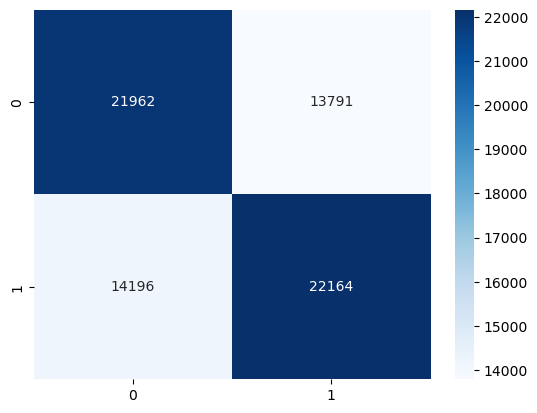

In [1104]:
validation(x_pred,y_train)

### On Test Data

In [1106]:
y_pred_prob = model.predict(sm.add_constant(X_test))

In [1107]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

Accuracy 0.6120139774807255
Precison 0.6117963668984077
Recall 0.6069640671932361
F1 Score 0.6093706371809906
Cohen kappa Score 0.22400445628319687
Classification Report
               precision    recall  f1-score   support

           0       0.61      0.62      0.61      9040
           1       0.61      0.61      0.61      8989

    accuracy                           0.61     18029
   macro avg       0.61      0.61      0.61     18029
weighted avg       0.61      0.61      0.61     18029

Confusion Matrix
 AxesSubplot(0.125,0.11;0.62x0.77)


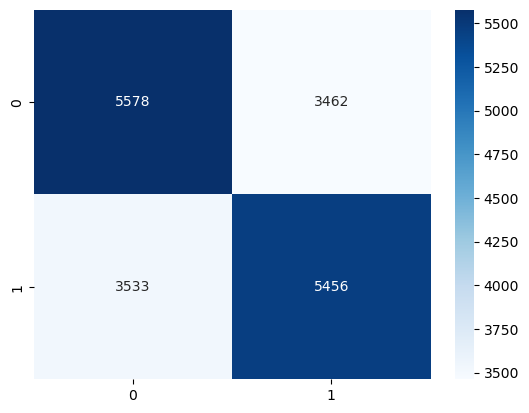

In [1108]:
validation(y_test,y_pred)

#### Adjust the cut off 

In [1109]:
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(model, cutoff):
    y_pred_prob = model.predict(X_test)
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    global score_card
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : roc_auc_score(y_test, y_pred),
                                    'Precision Score':precision_score(y_test, y_pred),
                                    'Recall Score':recall_score(y_test, y_pred),
                                    'Accuracy Score':accuracy_score(y_test, y_pred),
                                    'Kappa Score':cohen_kappa_score(y_test, y_pred),
                                    'f1-score':f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [1110]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for value in cutoff:
    update_score_card(model, value)

ValueError: shapes (18029,24) and (25,) not aligned: 24 (dim 1) != 25 (dim 0)

In [502]:
score_card

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.500385,0.453839,0.999755,0.454092,0.000699,0.624284
1,0.200000,0.511931,0.459690,0.991849,0.467441,0.021728,0.628220
2,0.300000,0.547133,0.479847,0.943267,0.510409,0.087127,0.636104
3,0.400000,0.589970,0.519142,0.779263,0.572422,0.172603,0.623146
4,0.500000,0.595694,0.581711,0.474976,0.606885,0.194415,0.522953
5,0.600000,0.548361,0.646534,0.177127,0.582776,0.103070,0.278073
6,0.700000,0.514073,0.682868,0.045810,0.557483,0.030564,0.085861
7,0.800000,0.505765,0.819905,0.014102,0.551344,0.012579,0.027727
8,0.900000,0.501250,0.894737,0.002771,0.547461,0.002732,0.005526


In [1111]:
# Defining function for roc_curve
def roc_curv(test,pred):
    fpr,tpr,thres=roc_curve(test,pred)
    print('AUC:',roc_auc_score(test,pred))
    plt.plot(fpr,tpr,color='red')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')
    

In [1112]:
# defining function for model implemnetation and get metrics
def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))

    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
   
    
    
    y_pred_prob = model.predict_proba(x_test)[:,1]
    validation(y_test,y_pred)
    
    
   

In [1113]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

<a id="logistic"></a>
## 17.3. Logistic Regression

LogisticRegression()
Accuracy 0.5850019413167674
Precison 0.5591955377484484
Recall 0.7918567137612638
F1 Score 0.6554931393314302
Cohen kappa Score 0.17097021692211012
Classification Report
               precision    recall  f1-score   support

           0       0.65      0.38      0.48      9040
           1       0.56      0.79      0.66      8989

    accuracy                           0.59     18029
   macro avg       0.60      0.59      0.57     18029
weighted avg       0.60      0.59      0.57     18029

Confusion Matrix
 AxesSubplot(0.125,0.11;0.62x0.77)


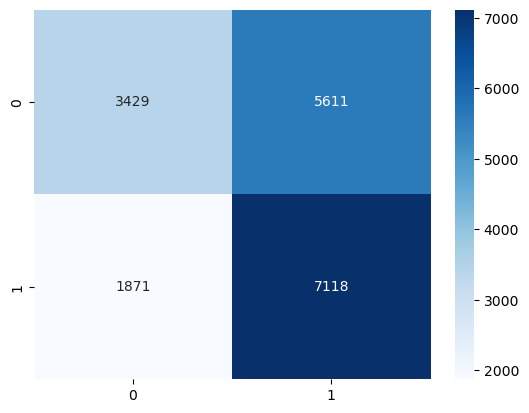

In [1114]:
model_results(LogisticRegression(),X_train,y_train,X_test,y_test)

<a id="knn3"></a>
## 17.4. KNN 3 Clusters Model

KNeighborsClassifier(n_neighbors=3)
Accuracy 0.570802595817849
Precison 0.567526719205441
Recall 0.5848258983201691
F1 Score 0.5760464606618453
Cohen kappa Score 0.14167212405217544
Classification Report
               precision    recall  f1-score   support

           0       0.57      0.56      0.57      9040
           1       0.57      0.58      0.58      8989

    accuracy                           0.57     18029
   macro avg       0.57      0.57      0.57     18029
weighted avg       0.57      0.57      0.57     18029

Confusion Matrix
 AxesSubplot(0.125,0.11;0.62x0.77)


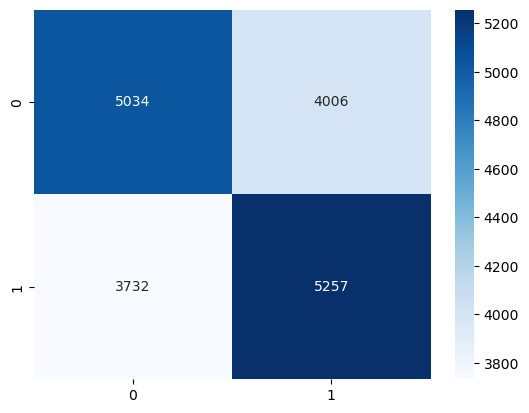

In [1115]:
model_results(KNeighborsClassifier(n_neighbors=3),X_train,y_train,X_test,y_test)

<a id="naive"></a>
## 17.5. Gaussian Naive Bayes Model

GaussianNB()
Accuracy 0.5486161184757891
Precison 0.5315488989397197
Recall 0.7975303148292358
F1 Score 0.6379248976686241
Cohen kappa Score 0.0984974806654686
Classification Report
               precision    recall  f1-score   support

           0       0.60      0.30      0.40      9040
           1       0.53      0.80      0.64      8989

    accuracy                           0.55     18029
   macro avg       0.57      0.55      0.52     18029
weighted avg       0.57      0.55      0.52     18029

Confusion Matrix
 AxesSubplot(0.125,0.11;0.62x0.77)


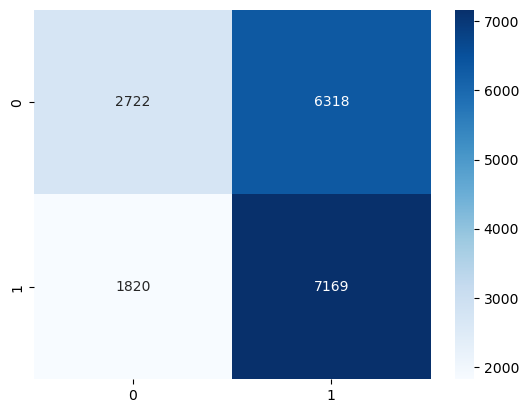

In [1117]:
model_results(GaussianNB(),X_train,y_train,X_test,y_test)

<a id="decisionTree"></a>
## 17.6. Decision Tree Model

DecisionTreeClassifier(max_depth=5)
Accuracy 0.6516168395363027
Precison 0.6764399270263226
Recall 0.5774835910557348
F1 Score 0.6230570725559622
Cohen kappa Score 0.30294045907318223
Classification Report
               precision    recall  f1-score   support

           0       0.63      0.73      0.68      9040
           1       0.68      0.58      0.62      8989

    accuracy                           0.65     18029
   macro avg       0.65      0.65      0.65     18029
weighted avg       0.65      0.65      0.65     18029

Confusion Matrix
 AxesSubplot(0.125,0.11;0.62x0.77)


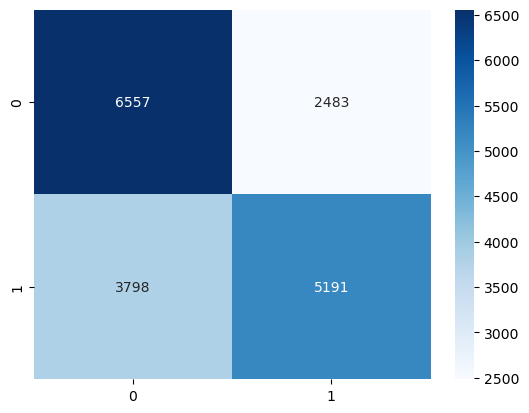

In [1118]:
model_results(DecisionTreeClassifier(max_depth=5),X_train,y_train,X_test,y_test)

In [1121]:
X_train.shape

(72113, 24)

<a id="randomForest"></a>
## 17.7. Random Forest Classifier

RandomForestClassifier(max_depth=5, n_estimators=500)
Accuracy 0.6783515447334849
Precison 0.6746222903437705
Recall 0.6855045055067305
F1 Score 0.680019864260884
Cohen kappa Score 0.3567272118372582
Classification Report
               precision    recall  f1-score   support

           0       0.68      0.67      0.68      9040
           1       0.67      0.69      0.68      8989

    accuracy                           0.68     18029
   macro avg       0.68      0.68      0.68     18029
weighted avg       0.68      0.68      0.68     18029

Confusion Matrix
 AxesSubplot(0.125,0.11;0.62x0.77)


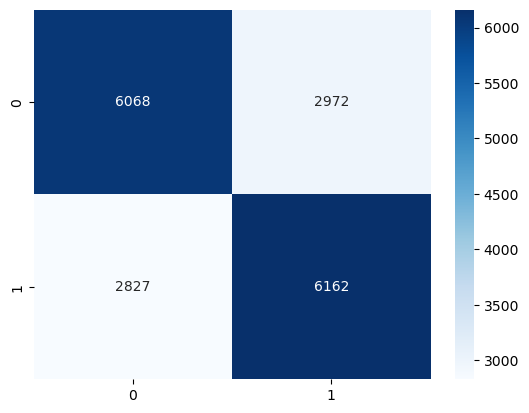

In [1119]:
model_results(RandomForestClassifier(n_estimators=500,max_depth=5),X_train,y_train,X_test,y_test)

<a id="grc"></a>
## 17.8. Gradient Boosting Classifier

GradientBoostingClassifier(n_estimators=200)
Accuracy 0.7474624216540019
Precison 0.7327875734676742
Recall 0.7767271109133386
F1 Score 0.7541178376626884
Cohen kappa Score 0.4950062168787922
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      9040
           1       0.73      0.78      0.75      8989

    accuracy                           0.75     18029
   macro avg       0.75      0.75      0.75     18029
weighted avg       0.75      0.75      0.75     18029

Confusion Matrix
 AxesSubplot(0.125,0.11;0.62x0.77)


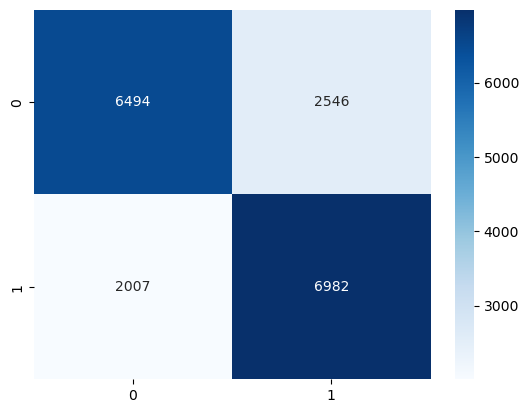

In [1120]:
model_results(GradientBoostingClassifier(n_estimators=200),X_train,y_train,X_test,y_test)

In [535]:
from sklearn.model_selection import GridSearchCV

In [538]:
params={'n_estimators':[400,500,650],
       'max_depth':[4,5,7],
       'learning_rate':[0.1,0.2,0.4],
       'max_leaves':[3,2,4]}
gd=GridSearchCV(estimator=XGBClassifier(),param_grid=params,cv=5)

In [539]:
gd.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [540]:
gd.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'max_leaves': 3, 'n_estimators': 650}

<a id="xgboost"></a>
## 17.9. XG Boost Model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=650, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy 0.8177935548283322
Precison 0.804310712761417
Recall 0.8385804872622094
F1 Score 0.8210881760252711
Cohen kappa Score 0.6356279865566923
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.

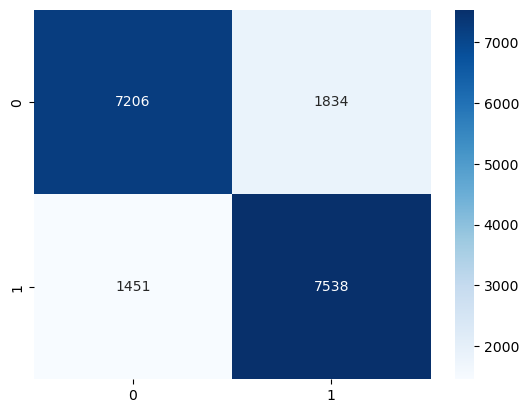

In [1122]:
model_results(XGBClassifier(n_estimators=650,learning_rate=0.2,max_depth=7,max_leaves=3),X_train,y_train,X_test,y_test)

In [1123]:
XGB=XGBClassifier(n_estimators=500)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [1124]:
pred_xgb=XGB.predict(X_test)

In [1125]:
imp=XGB.feature_importances_

In [1126]:
fe_df=pd.DataFrame({'Features':X_train.columns,'Importance':imp})

In [1127]:
fe_df=fe_df.sort_values('Importance',ascending=False)

<AxesSubplot:xlabel='Importance', ylabel='Features'>

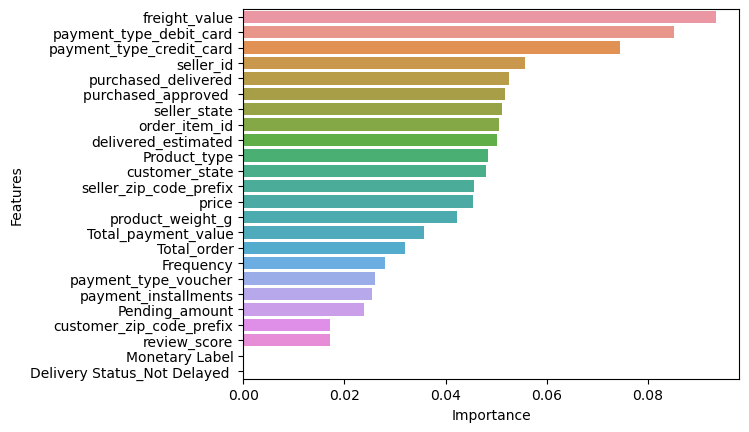

In [1128]:
sns.barplot(fe_df['Importance'],fe_df.Features)

In [585]:
from sklearn.linear_model import Lasso

In [582]:
chi2_feat=SelectKBest(chi2,k='all')

<a id="st"></a>
# 18. Stacking Technique

In [487]:
from sklearn.ensemble import StackingClassifier

In [488]:
base_model = [('Grad Bossting',GradientBoostingClassifier()),('RFC',RandomForestClassifier(max_depth=5)),('DT',DecisionTreeClassifier())]
final_model = XGBClassifier(n_estimatores=650)

In [489]:
stack_model = StackingClassifier(estimators=base_model,final_estimator=final_model)

StackingClassifier(estimators=[('Grad Bossting', GradientBoostingClassifier()),
                               ('RFC', RandomForestClassifier(max_depth=5)),
                               ('DT', DecisionTreeClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eva...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interac

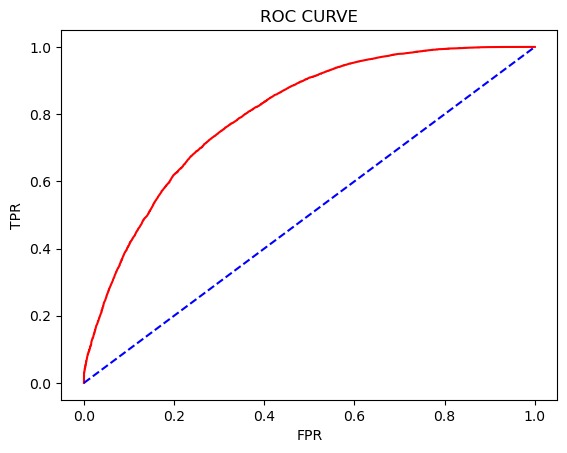

In [490]:
model_results(StackingClassifier(estimators=base_model,final_estimator=final_model),X_train,y_train,X_test,y_test)

<a id="rfe"></a>
# 19. Recursive Feature Elimination for model

<a id="rfexg"></a>
## 19.1. XGBoost Model - RFE

In [491]:
%%time
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]
xg =  XGBClassifier()
xgb_model = RFE(estimator = xg, n_features_to_select = 10)
rfe_model = xgb_model.fit(X_train_rfe, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)
signi_feat_rfe_xg = feat_index[feat_index==1].index
print(signi_feat_rfe_xg)

Index(['customer_state', 'purchased_approved ', 'purchased_delivered',
       'seller_id', 'seller_zip_code_prefix', 'seller_state', 'price',
       'freight_value', 'Product_type', 'payment_type_debit_card'],
      dtype='object')
Wall time: 46.9 s


<a id="interpretation"></a>
# 20.  Model Interpretation

Since the **target class is balanced**, we can **any of the metrics** below to measure the **model performance**. 

1. **Accuracy**: This metric measures the **proportion of correct predictions** made by the model over all predictions made. It is a simple and intuitive measure, but it may not be the best choice when classes are imbalanced.
2. **Precision**: Precision measures the **proportion of true positives (correctly predicted positives) out of all predicted positives**. It is a useful metric when you want to minimize false positives.
3. **Recall**: Recall measures the **proportion of true positives out of all actual positives in the data**. It is a useful metric when you want to minimize false negatives.
4. **F1 score**: The F1 score is the **harmonic mean of precision and recall**. It balances the tradeoff between precision and recall and provides a single measure of performance.
5. **Area under the ROC curve (AUC-ROC)**: AUC-ROC is a metric that measures the **ability of the model to distinguish between positive and negative classes**. It is a good metric when you want to evaluate the overall performance of the model across different thresholds.

The choice of metric depends on the specific goals of the problem and the tradeoffs we want to make between different types of errors.

**Classification report (XG Boost Model)**
1. Percision = 0.80 (high - Number of False positives are low)
2. Recall = 0.81 (high - Number of False negatives are low)
3. F1 Score = 0.81 (high - imbalance in recall and percision is low)
4. Accuracy = 0.8279

**The XG Boost is the best model for predicting Churn classification**.